The following code is the same as that in the file "Classification.ipynb", except that the handling of class imbalance is different. This time, the weighted resampling method was used instead of SMOTE

In [40]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [41]:
path = "../archive/hmnist_28_28_RGB.csv"
df=pd.read_csv(path)
df.tail(5) 


pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
10010        183        165        181        182        165        180   
10011          2          3          1         38         33         32   
10012        132        118        118        167        149        149   
10013        160        124        146        164        131        152   
10014        175        142        121        181        150        134   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
10010        184        166        182        188  ...        208        185   
10011        121        104        103        132  ...         96         79   
10012        175        156        160        184  ...        204        181   
10013        167        127        146        169  ...        185        162   
10014        181        150        133        178  ...        159         79   

       pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
10010        187        208        186        186        206        187   
10011         76         24         23         21          3          4   
10012        178        181        159        153        172        151   
10013        167        184        157        166        185        162   
10014         82        174        137        125        175        139   

       pixel2351  label  
10010        189      0  
10011          1      0  
10012        145      0  
10013        172      0  
10014        126      6  

[5 rows x 2353 columns]

In [42]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1) 

train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

num_rows = df.shape[0]
print(num_rows)  

print(len(train_set))
print(len(test_set))
df.label.unique()

10015
8012
2003


array([4, 6, 1, 0, 2, 3, 5], dtype=int64)

In [43]:
classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

In [44]:
y_train=train_set['label'] 
x_train=train_set.drop(columns=['label']) 

y_test=test_set['label']
x_test=test_set.drop(columns=['label'])

columns=list(x_train) 


In [45]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


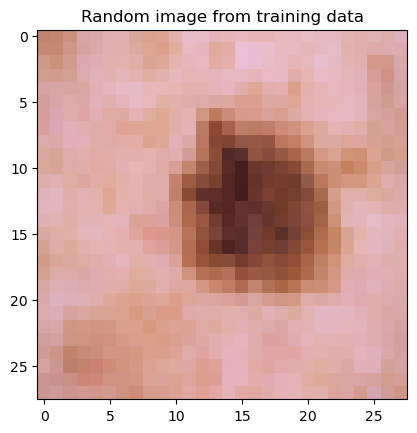

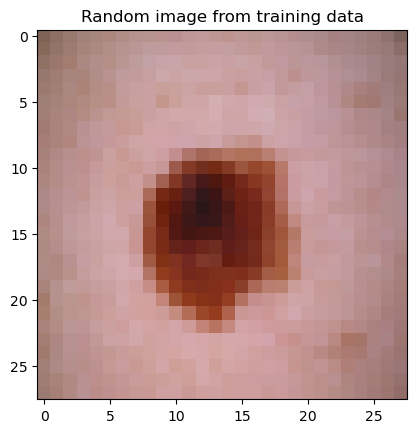

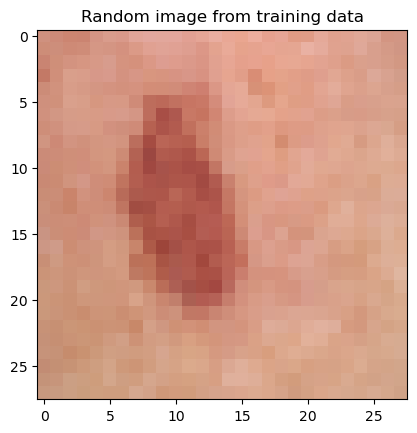

In [47]:
import matplotlib.pyplot as plt
import random


num=random.randint(0,8000)
x_train_resampled=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)
plt.imshow(x_train_resampled[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train_resampled[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train_resampled[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

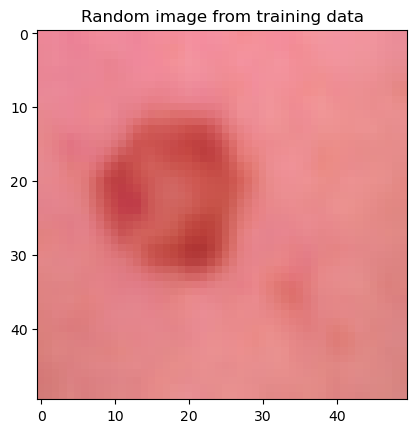

In [71]:
import cv2
x_train_resampled = np.array([cv2.resize(img, (50,50)) for img in x_train_resampled], dtype=np.uint8)
plt.imshow(x_train_resampled[num].reshape(50,50,3))
plt.title("Random image from training data")
plt.show()

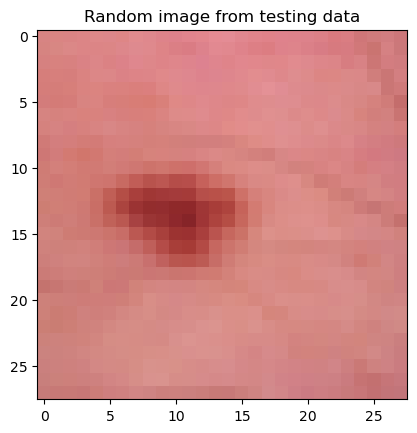

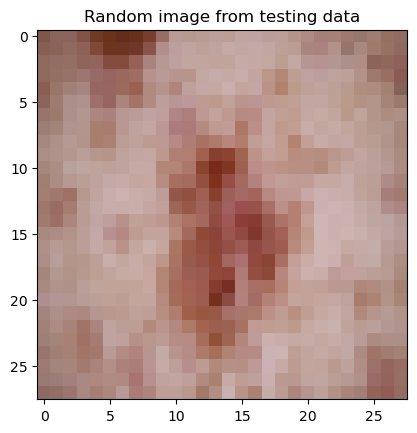

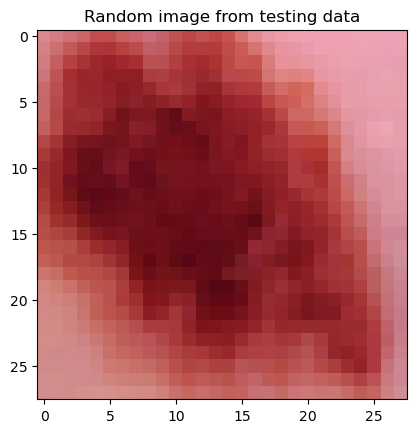

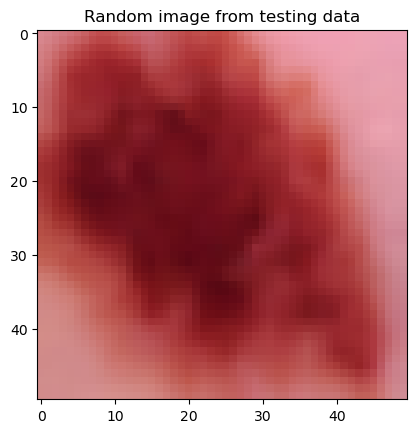

In [77]:
import matplotlib.pyplot as plt
import random
import cv2


num=random.randint(0,2000)
x_test_resampled=np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)
plt.imshow(x_test_resampled[num].reshape(28,28,3))
plt.title("Random image from testing data")
plt.show()

num=random.randint(0,2000)
plt.imshow(x_test_resampled[num].reshape(28,28,3))
plt.title("Random image from testing data")
plt.show()

num=random.randint(0,2000)
plt.imshow(x_test_resampled[num].reshape(28,28,3))
plt.title("Random image from testing data")
plt.show()


x_test_resampled = np.array([cv2.resize(img, (50,50)) for img in x_test_resampled], dtype=np.uint8)
plt.imshow(x_test_resampled[num].reshape(50,50,3))
plt.title("Random image from testing data")
plt.show()

Création d'un modèle de réseau de neurone convolutionnels (en utilisant l'API Keras de tenserflow).


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf
      
%time 

model = Sequential() 
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (50, 50, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu',padding='same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu',padding='same'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu',padding='same'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu',padding='same'))



model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))


model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: total: 0 ns
Wall time: 0 ns
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_18 (Bat  (None, 25, 25, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 25, 25, 32)        4640      
                                                                 
 conv2d_17 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_

In [51]:
%time 
optimizer=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: total: 0 ns
Wall time: 0 ns


The lines assign appropriate class weights to ensure that the model gives equal importance to each class during training, leading to better performance across all classes.

In [52]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

In [53]:
from datetime import datetime
start_time = datetime.now()



history = model.fit(x_train_resampled,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/50
51/51 [==============================] - 12s 207ms/step - loss: 1.6976 - accuracy: 0.4778 - val_loss: 2.1408 - val_accuracy: 0.6681
Epoch 2/50
51/51 [==============================] - 10s 197ms/step - loss: 1.2526 - accuracy: 0.6435 - val_loss: 1.4350 - val_accuracy: 0.5452
Epoch 3/50
51/51 [==============================] - 8s 148ms/step - loss: 1.0730 - accuracy: 0.6932 - val_loss: 0.9795 - val_accuracy: 0.6893
Epoch 4/50
51/51 [==============================] - 8s 155ms/step - loss: 0.9169 - accuracy: 0.7154 - val_loss: 0.9274 - val_accuracy: 0.7018
Epoch 5/50
51/51 [==============================] - 11s 221ms/step - loss: 0.8514 - accuracy: 0.7235 - val_loss: 0.9790 - val_accuracy: 0.6881
Epoch 6/50
51/51 [==============================] - 9s 167ms/step - loss: 0.8016 - accuracy: 0.7379 - val_loss: 1.1407 - val_accuracy: 0.6450
Epoch 7/50
51/51 [==============================] - 10s 199ms/step - loss: 0.7557 - accuracy: 0.7418 - val_loss: 0.8960 - val_accuracy: 0.7193
Ep

In [54]:

mean_train_loss = np.mean(history.history['loss'])
mean_train_accuracy = np.mean(history.history['accuracy'])
mean_val_loss = np.mean(history.history['val_loss'])
mean_val_accuracy = np.mean(history.history['val_accuracy'])

print("Moyenne Loss (Entraînement):", mean_train_loss)
print("Moyenne Accuracy (Entraînement):", mean_train_accuracy)
print("Moyenne Loss (Validation):", mean_val_loss)
print("Moyenne Accuracy (Validation):", mean_val_accuracy)

Moyenne Loss (Entraînement): 0.448756038248539
Moyenne Accuracy (Entraînement): 0.8479794031381607
Moyenne Loss (Validation): 0.9651302361488342
Moyenne Accuracy (Validation): 0.718278226852417


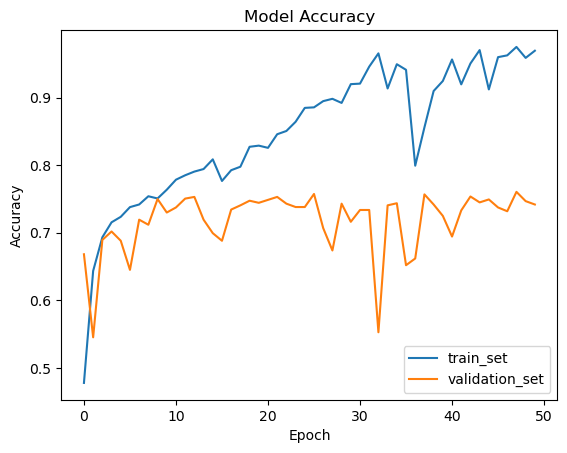

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_set', 'validation_set'], loc='lower right')
plt.show()

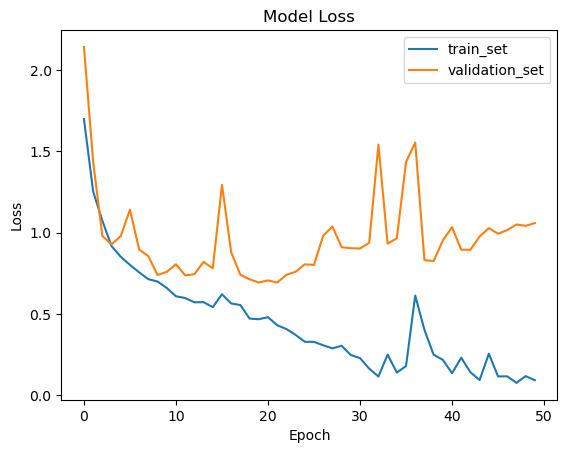

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_set', 'validation_set'], loc='upper right')
plt.show()

In [58]:
loss, acc = model.evaluate(x_test_resampled, y_test, verbose=1)

63/63 [==============================] - 2s 34ms/step - loss: 1.1719 - accuracy: 0.7329


600 450


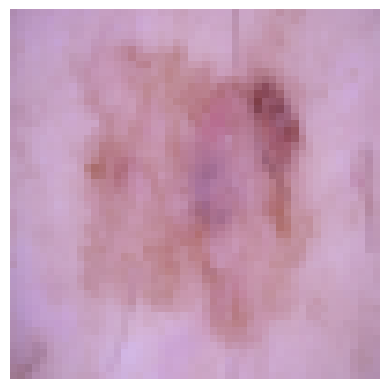

1/1 [==============================] - 1s 561ms/step
[2.9676927e-02 1.8500055e-03 9.3129665e-01 2.7372746e-04 2.0971572e-02
 3.2352019e-04 1.5607621e-02]
('bkl', 'benign keratosis-like lesions')


In [59]:
import PIL
import matplotlib.pyplot as plt
import numpy as np

image = PIL.Image.open('../archive/HAM10000_images_part_1/ISIC_0024312.jpg')
largeur, hauteur = image.size
print(largeur, hauteur)
image = image.resize((50, 50))

img = np.array(image)

plt.imshow(img)
plt.axis('off')  
plt.show()

img = np.array(image).reshape(-1, 50, 50, 3)
result = model.predict(img)
print(result[0])
result = result.tolist()
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
print(classes[class_ind])

1/1 [==============================] - 0s 64ms/step
Prédiction correcte pour l'image ISIC_0024306.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 78ms/step
Prédiction correcte pour l'image ISIC_0024307.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 80ms/step
Prédiction correcte pour l'image ISIC_0024308.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024309.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024310.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024311.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024312.jpg: Classe prédite = bkl, Classe réelle =

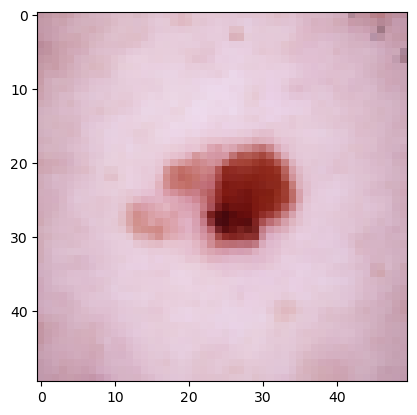

1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024314.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024315.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024316.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 78ms/step
Prédiction correcte pour l'image ISIC_0024317.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024318.jpg: Classe prédite = df, Classe réelle = df
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024319.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 74ms/step
Prédiction correcte pour l'image ISIC_0024320.jpg: Classe prédite = nv, Classe réelle = 

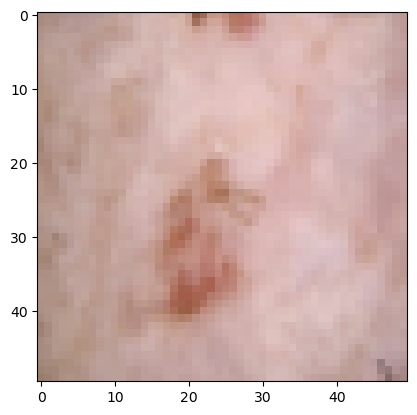

1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024330.jpg: Classe prédite = df, Classe réelle = df
1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0024331.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 78ms/step
Prédiction correcte pour l'image ISIC_0024332.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024333.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024334.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 74ms/step
Prédiction correcte pour l'image ISIC_0024335.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024336.jpg: Classe prédite = bkl, Classe réel

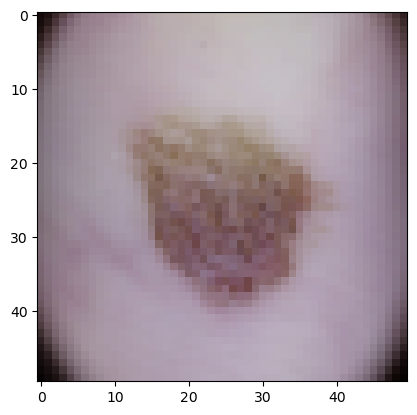

1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024341.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024342.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction incorrecte pour l'image ISIC_0024343.jpg: Classe prédite = mel, Classe réelle = nv


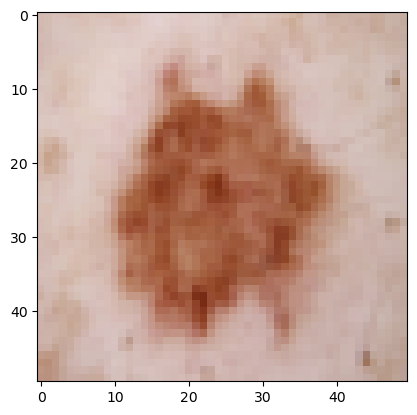

1/1 [==============================] - 0s 73ms/step
Prédiction incorrecte pour l'image ISIC_0024344.jpg: Classe prédite = mel, Classe réelle = nv


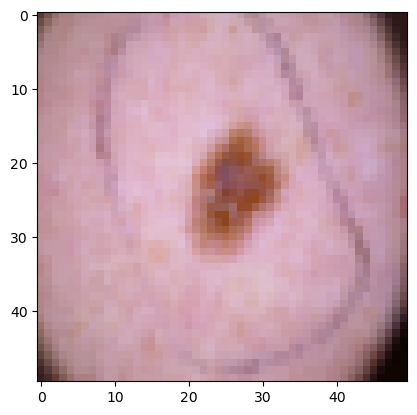

1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024345.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 78ms/step
Prédiction correcte pour l'image ISIC_0024346.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0024347.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024348.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 76ms/step
Prédiction correcte pour l'image ISIC_0024349.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0024350.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 78ms/step
Prédiction incorrecte pour l'image ISIC_0024351.jpg: Classe prédite = nv, Classe réelle 

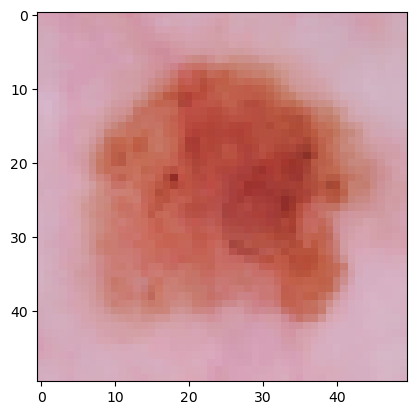

1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024352.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024353.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024354.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024355.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024356.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024357.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction incorrecte pour l'image ISIC_0024358.jpg: Classe prédite = mel, Classe réelle =

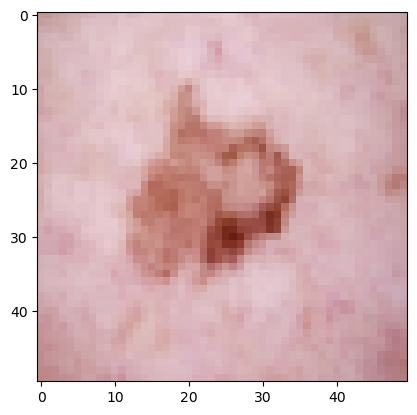

1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024359.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024360.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024361.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024362.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024363.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024364.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024365.jpg: Classe prédite = nv, Classe réelle = 

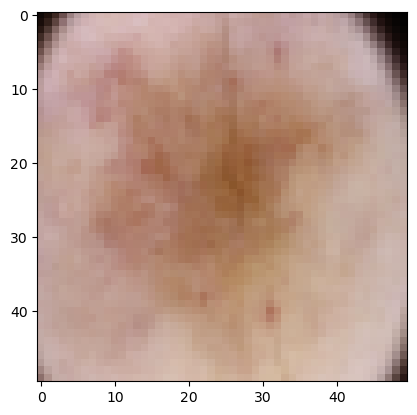

1/1 [==============================] - 0s 68ms/step
Prédiction incorrecte pour l'image ISIC_0024372.jpg: Classe prédite = bkl, Classe réelle = akiec


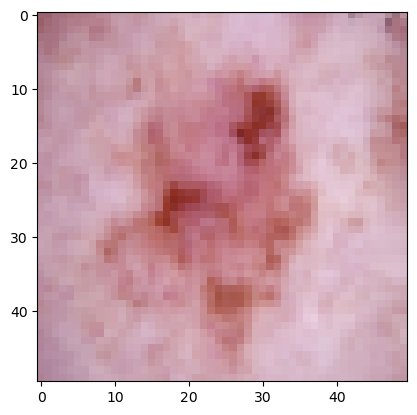

1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024373.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 69ms/step
Prédiction correcte pour l'image ISIC_0024374.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 72ms/step
Prédiction correcte pour l'image ISIC_0024375.jpg: Classe prédite = vasc, Classe réelle = vasc
1/1 [==============================] - 0s 78ms/step
Prédiction correcte pour l'image ISIC_0024376.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 83ms/step
Prédiction incorrecte pour l'image ISIC_0024377.jpg: Classe prédite = mel, Classe réelle = nv


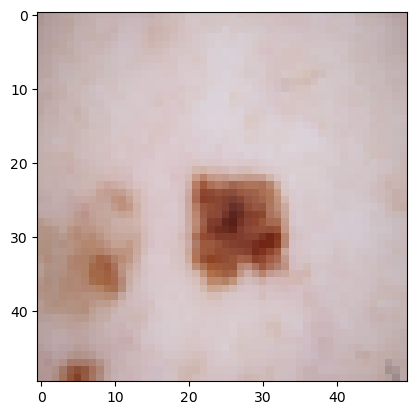

1/1 [==============================] - 0s 79ms/step
Prédiction incorrecte pour l'image ISIC_0024378.jpg: Classe prédite = mel, Classe réelle = nv


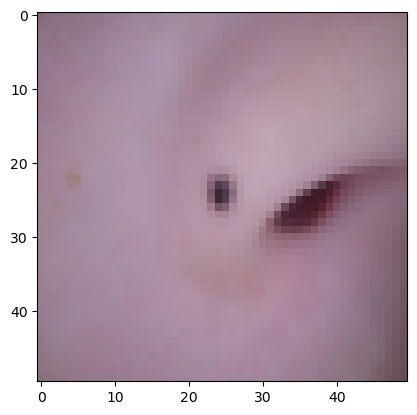

1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024379.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024380.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024381.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024382.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 63ms/step
Prédiction incorrecte pour l'image ISIC_0024383.jpg: Classe prédite = nv, Classe réelle = bkl


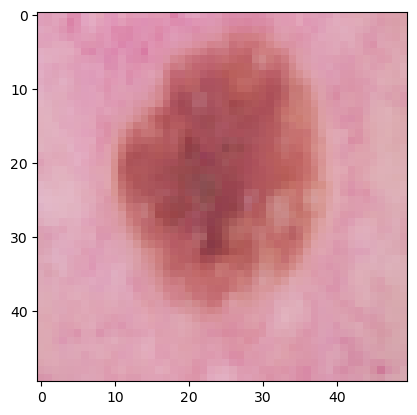

1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024384.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024385.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction incorrecte pour l'image ISIC_0024386.jpg: Classe prédite = nv, Classe réelle = df


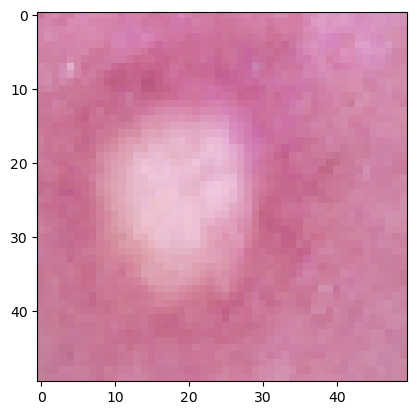

1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0024387.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 76ms/step
Prédiction correcte pour l'image ISIC_0024388.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024389.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024390.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024391.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024392.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024393.jpg: Classe prédite = nv, Classe réelle = nv

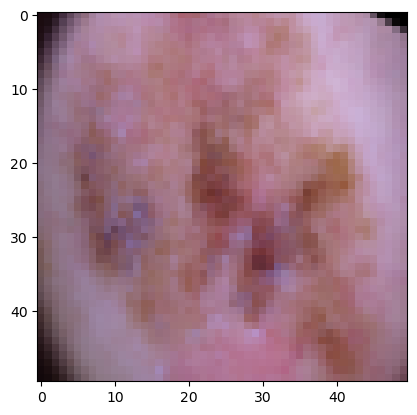

1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0024401.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 71ms/step
Prédiction correcte pour l'image ISIC_0024402.jpg: Classe prédite = vasc, Classe réelle = vasc
1/1 [==============================] - 0s 67ms/step
Prédiction correcte pour l'image ISIC_0024403.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024404.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024405.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024406.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024407.jpg: Classe prédite = nv, Classe réell

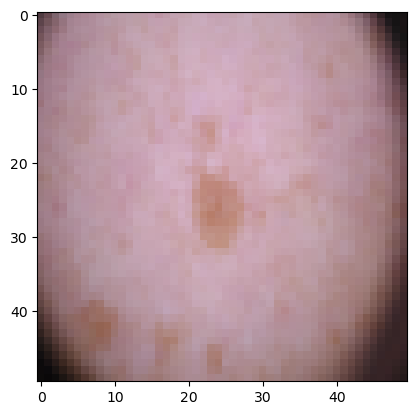

1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0024410.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 69ms/step
Prédiction correcte pour l'image ISIC_0024411.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 65ms/step
Prédiction correcte pour l'image ISIC_0024412.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024413.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024414.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024415.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024416.jpg: Classe prédite = nv, Classe réell

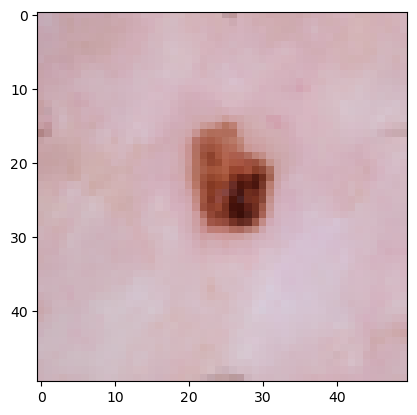

1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024419.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024420.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024421.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024422.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024423.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024424.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 79ms/step
Prédiction incorrecte pour l'image ISIC_0024425.jpg: Classe prédite = bkl, Classe réel

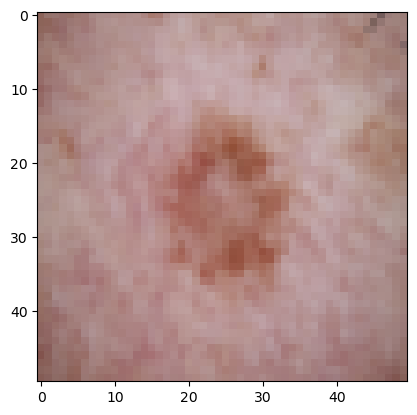

1/1 [==============================] - 0s 78ms/step
Prédiction incorrecte pour l'image ISIC_0024426.jpg: Classe prédite = akiec, Classe réelle = bkl


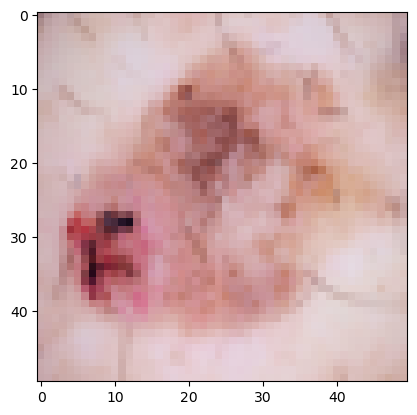

1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024427.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024428.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024429.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024430.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 61ms/step
Prédiction incorrecte pour l'image ISIC_0024431.jpg: Classe prédite = akiec, Classe réelle = bcc


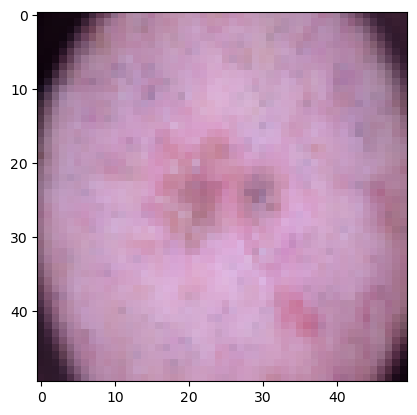

1/1 [==============================] - 0s 64ms/step
Prédiction correcte pour l'image ISIC_0024432.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024433.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024434.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024435.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0024436.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024437.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024438.jpg: Classe prédite = nv, Classe réell

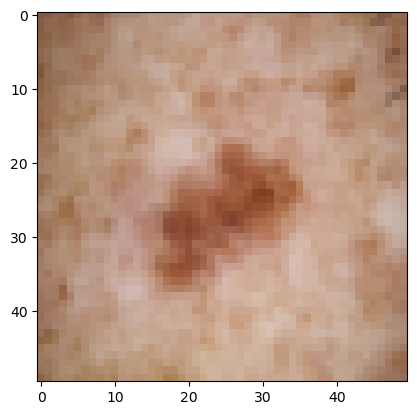

1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024440.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024441.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 74ms/step
Prédiction correcte pour l'image ISIC_0024442.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0024443.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 78ms/step
Prédiction correcte pour l'image ISIC_0024444.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 78ms/step
Prédiction correcte pour l'image ISIC_0024445.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024446.jpg: Classe prédite = bkl, Classe réelle

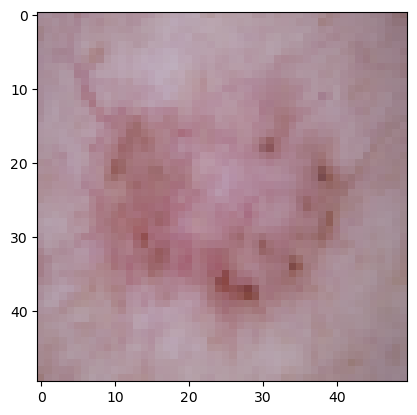

1/1 [==============================] - 0s 79ms/step
Prédiction incorrecte pour l'image ISIC_0024449.jpg: Classe prédite = bkl, Classe réelle = mel


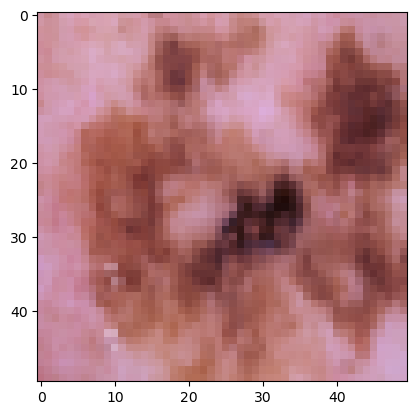

1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024450.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024451.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0024452.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024453.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024454.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024455.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024456.jpg: Classe prédite = nv, Classe

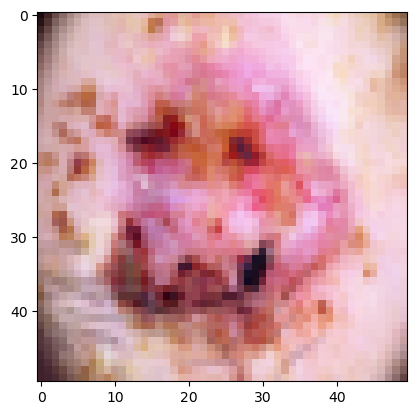

1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024458.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 75ms/step
Prédiction correcte pour l'image ISIC_0024459.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024460.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024461.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024462.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024463.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 64ms/step
Prédiction correcte pour l'image ISIC_0024464.jpg: Classe prédite = nv, Classe r

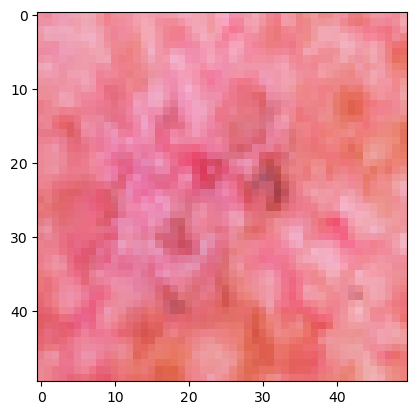

1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024469.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024470.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024471.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024472.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 65ms/step
Prédiction correcte pour l'image ISIC_0024473.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024474.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 78ms/step
Prédiction correcte pour l'image ISIC_0024475.jpg: Classe prédite = vasc, Classe

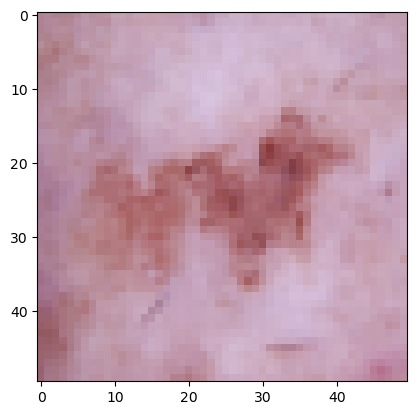

1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024477.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024478.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 69ms/step
Prédiction correcte pour l'image ISIC_0024479.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 57ms/step
Prédiction incorrecte pour l'image ISIC_0024480.jpg: Classe prédite = akiec, Classe réelle = nv


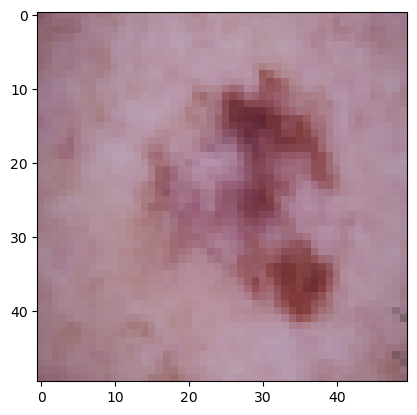

1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024481.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024482.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024483.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024484.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 74ms/step
Prédiction correcte pour l'image ISIC_0024485.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024486.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024487.jpg: Classe prédite = nv, Classe réelle 

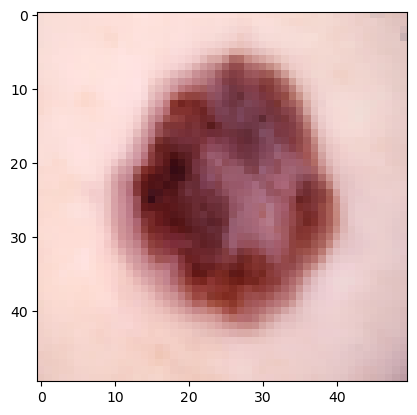

1/1 [==============================] - 0s 77ms/step
Prédiction incorrecte pour l'image ISIC_0024495.jpg: Classe prédite = nv, Classe réelle = bkl


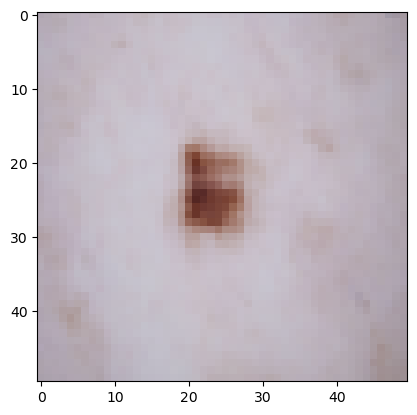

1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024496.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024497.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0024498.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0024499.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024500.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0024501.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024502.jpg: Classe prédite = nv, Classe réelle 

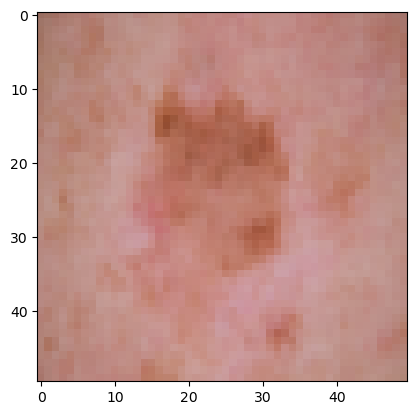

1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024506.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024507.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024508.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024509.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024510.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 78ms/step
Prédiction correcte pour l'image ISIC_0024511.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0024512.jpg: Classe prédite = nv, Classe réell

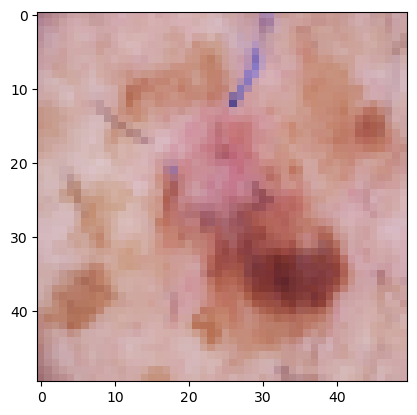

1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024516.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 19ms/step
Prédiction incorrecte pour l'image ISIC_0024517.jpg: Classe prédite = nv, Classe réelle = akiec


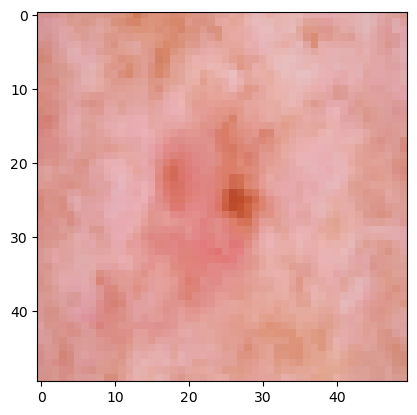

1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024518.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024519.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024520.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024521.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction incorrecte pour l'image ISIC_0024522.jpg: Classe prédite = bkl, Classe réelle = akiec


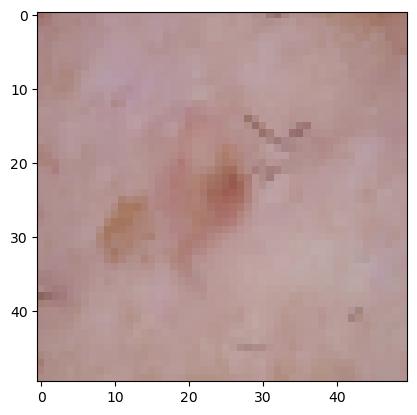

1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024523.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024524.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024525.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024526.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024527.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024528.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024529.jpg: Classe prédite = nv, Classe réelle = 

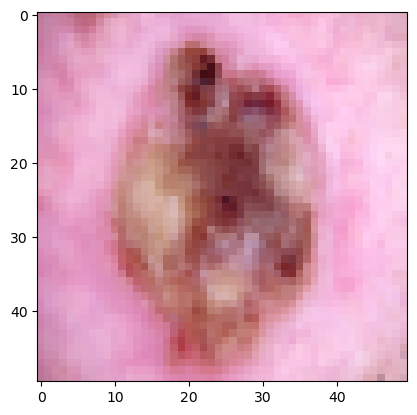

1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024540.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024541.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 25ms/step
Prédiction correcte pour l'image ISIC_0024542.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024543.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 39ms/step
Prédiction correcte pour l'image ISIC_0024544.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024545.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024546.jpg: Classe prédite = mel, Classe réelle =

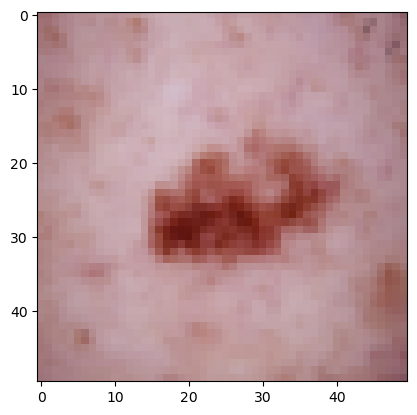

1/1 [==============================] - 0s 6ms/step
Prédiction correcte pour l'image ISIC_0024561.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 27ms/step
Prédiction correcte pour l'image ISIC_0024562.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024563.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024564.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024565.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 25ms/step
Prédiction incorrecte pour l'image ISIC_0024566.jpg: Classe prédite = bkl, Classe réelle = nv


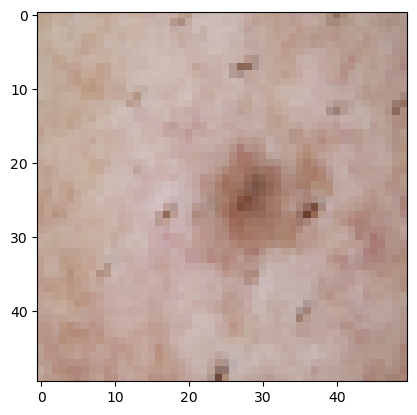

1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024567.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024568.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024569.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024570.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024571.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024572.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 14ms/step
Prédiction correcte pour l'image ISIC_0024573.jpg: Classe prédite = bcc, Classe réelle

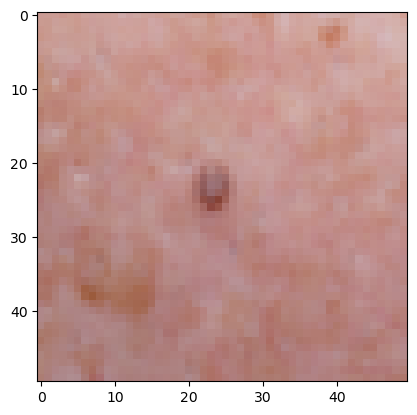

1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0024605.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 29ms/step
Prédiction correcte pour l'image ISIC_0024606.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024607.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 26ms/step
Prédiction correcte pour l'image ISIC_0024608.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024609.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024610.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024611.jpg: Classe prédite = nv, Classe réelle = nv

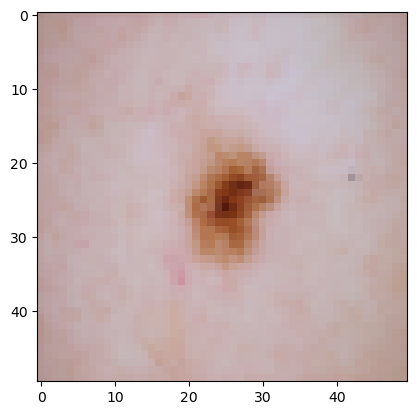

1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024613.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024614.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024615.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 41ms/step
Prédiction correcte pour l'image ISIC_0024616.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 25ms/step
Prédiction correcte pour l'image ISIC_0024617.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024618.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024619.jpg: Classe prédite = nv, Classe réelle = nv

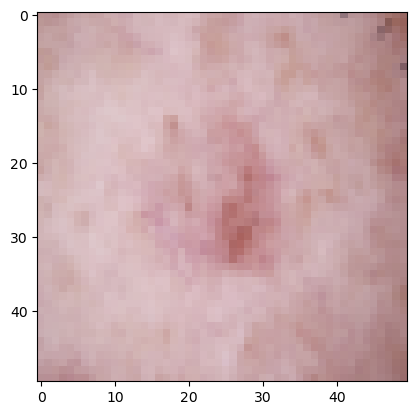

1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024633.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024634.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 17ms/step
Prédiction incorrecte pour l'image ISIC_0024635.jpg: Classe prédite = mel, Classe réelle = bkl


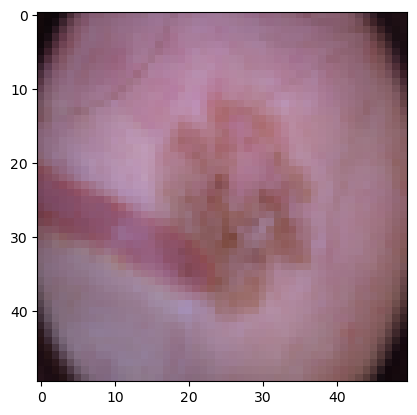

1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024636.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024637.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024638.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024639.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0024640.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024641.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024642.jpg: Classe prédite = nv, Classe réelle = 

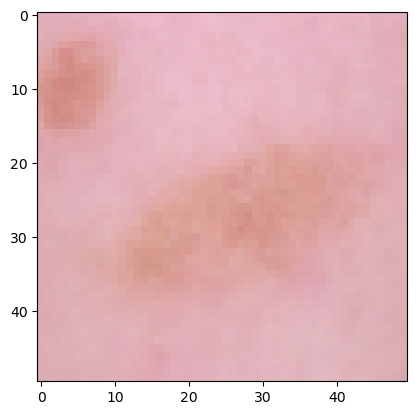

1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024644.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0024645.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024646.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024647.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 30ms/step
Prédiction correcte pour l'image ISIC_0024648.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024649.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024650.jpg: Classe prédite = nv, Classe r

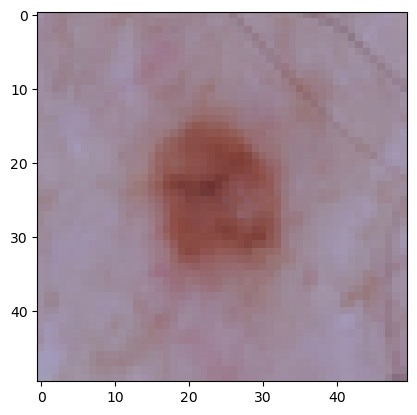

1/1 [==============================] - 0s 25ms/step
Prédiction correcte pour l'image ISIC_0024658.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 49ms/step
Prédiction correcte pour l'image ISIC_0024659.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024660.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024661.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024662.jpg: Classe prédite = vasc, Classe réelle = vasc
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024663.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024664.jpg: Classe prédite = nv, Classe réelle 

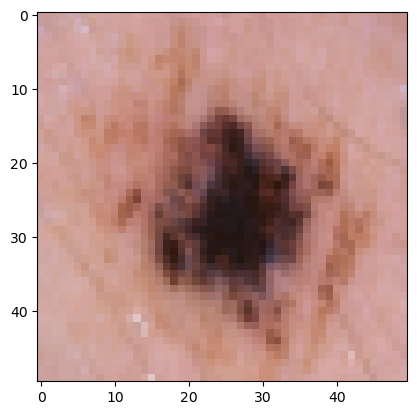

1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024683.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction incorrecte pour l'image ISIC_0024684.jpg: Classe prédite = bkl, Classe réelle = nv


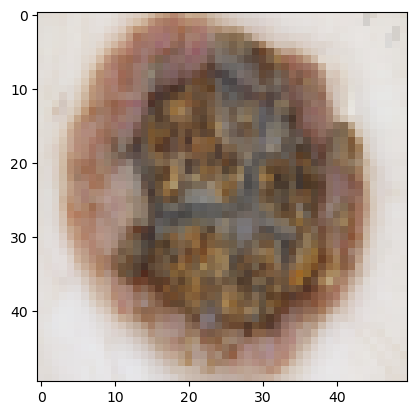

1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024685.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024686.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024687.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024688.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024689.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 39ms/step
Prédiction correcte pour l'image ISIC_0024690.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024691.jpg: Classe prédite = nv, Classe réelle = 

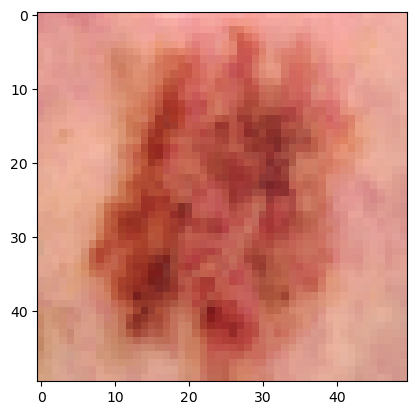

1/1 [==============================] - 0s 32ms/step
Prédiction incorrecte pour l'image ISIC_0024701.jpg: Classe prédite = nv, Classe réelle = mel


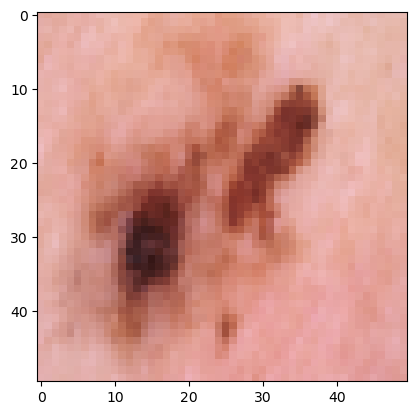

1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0024702.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 26ms/step
Prédiction correcte pour l'image ISIC_0024703.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024704.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024705.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024706.jpg: Classe prédite = vasc, Classe réelle = vasc
1/1 [==============================] - 0s 34ms/step
Prédiction incorrecte pour l'image ISIC_0024707.jpg: Classe prédite = bcc, Classe réelle = akiec


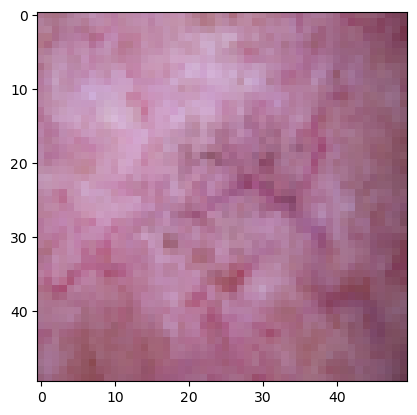

1/1 [==============================] - 0s 27ms/step
Prédiction correcte pour l'image ISIC_0024708.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024709.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 17ms/step
Prédiction incorrecte pour l'image ISIC_0024710.jpg: Classe prédite = bcc, Classe réelle = akiec


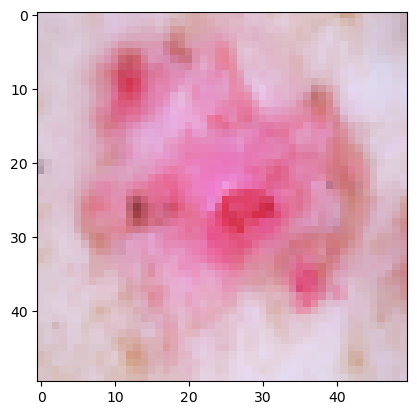

1/1 [==============================] - 0s 22ms/step
Prédiction incorrecte pour l'image ISIC_0024711.jpg: Classe prédite = mel, Classe réelle = bkl


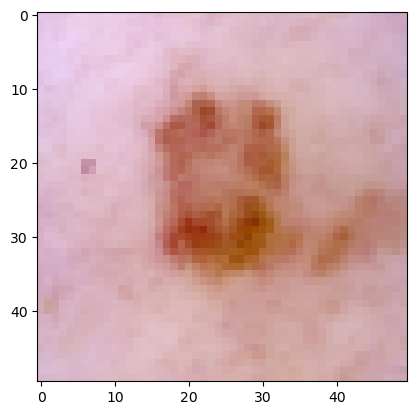

1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024712.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024713.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024714.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024715.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024716.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024717.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024718.jpg: Classe prédite = nv, Classe réelle = nv

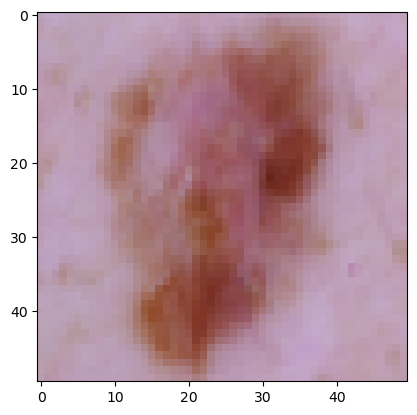

1/1 [==============================] - 0s 35ms/step
Prédiction correcte pour l'image ISIC_0024724.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024725.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024726.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024727.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024728.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 39ms/step
Prédiction correcte pour l'image ISIC_0024729.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024730.jpg: Classe prédite = nv, Classe réelle 

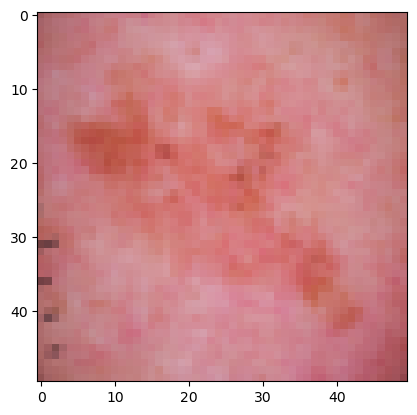

1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024734.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024735.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 27ms/step
Prédiction correcte pour l'image ISIC_0024736.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0024737.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024738.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024739.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024740.jpg: Classe prédite = bkl, Classe réelle =

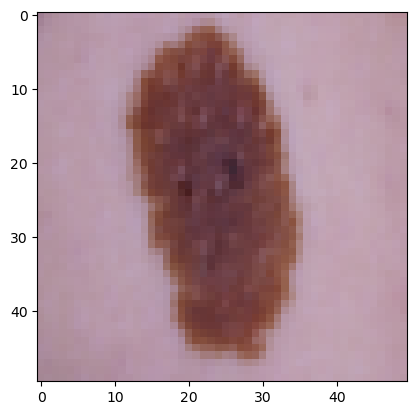

1/1 [==============================] - 0s 13ms/step
Prédiction correcte pour l'image ISIC_0024746.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024747.jpg: Classe prédite = vasc, Classe réelle = vasc
1/1 [==============================] - 0s 18ms/step
Prédiction incorrecte pour l'image ISIC_0024748.jpg: Classe prédite = mel, Classe réelle = bkl


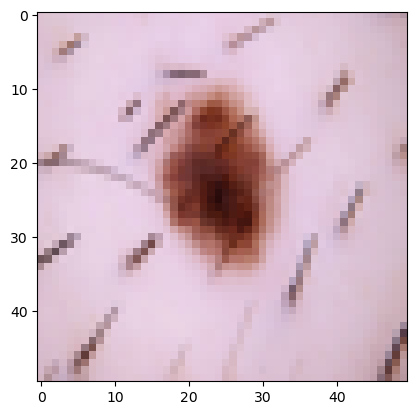

1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024749.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024750.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024751.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction incorrecte pour l'image ISIC_0024752.jpg: Classe prédite = mel, Classe réelle = nv


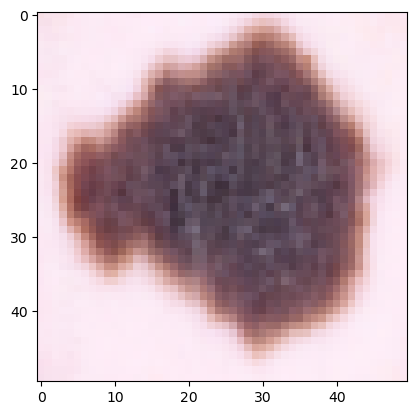

1/1 [==============================] - 0s 26ms/step
Prédiction correcte pour l'image ISIC_0024753.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024754.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024755.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024756.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 12ms/step
Prédiction correcte pour l'image ISIC_0024757.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024758.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024759.jpg: Classe prédite = nv, Classe réelle 

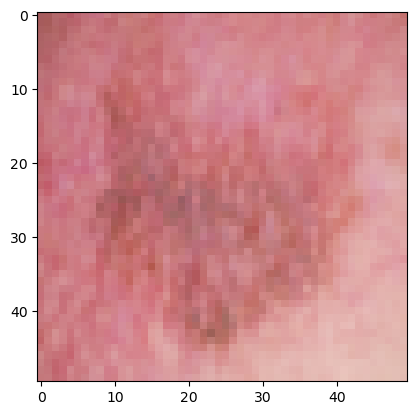

1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024764.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024765.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024766.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 36ms/step
Prédiction correcte pour l'image ISIC_0024767.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024768.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024769.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024770.jpg: Classe prédite = bkl, Classe réelle =

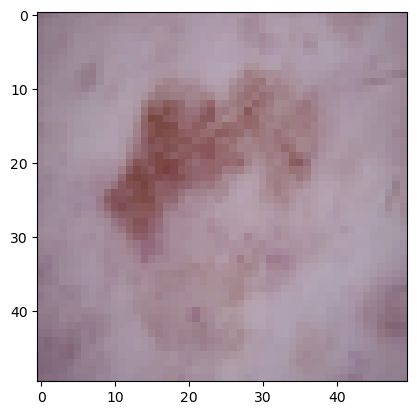

1/1 [==============================] - 0s 27ms/step
Prédiction correcte pour l'image ISIC_0024787.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024788.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024789.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction incorrecte pour l'image ISIC_0024790.jpg: Classe prédite = mel, Classe réelle = nv


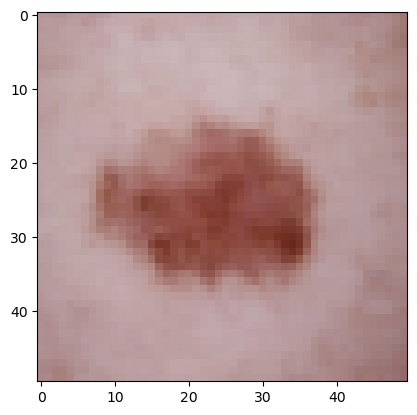

1/1 [==============================] - 0s 29ms/step
Prédiction correcte pour l'image ISIC_0024791.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0024792.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024793.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 27ms/step
Prédiction correcte pour l'image ISIC_0024794.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction incorrecte pour l'image ISIC_0024795.jpg: Classe prédite = akiec, Classe réelle = bcc


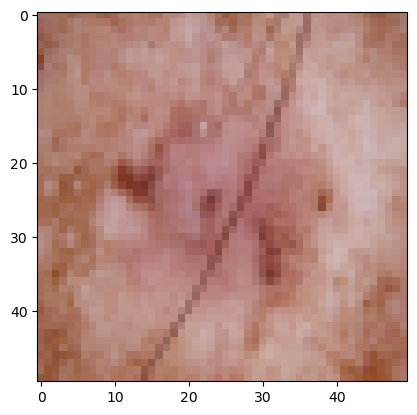

1/1 [==============================] - 0s 48ms/step
Prédiction correcte pour l'image ISIC_0024796.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 26ms/step
Prédiction correcte pour l'image ISIC_0024797.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction incorrecte pour l'image ISIC_0024798.jpg: Classe prédite = bkl, Classe réelle = nv


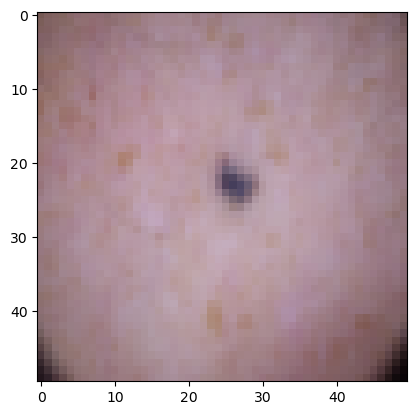

1/1 [==============================] - 0s 32ms/step
Prédiction incorrecte pour l'image ISIC_0024799.jpg: Classe prédite = nv, Classe réelle = bcc


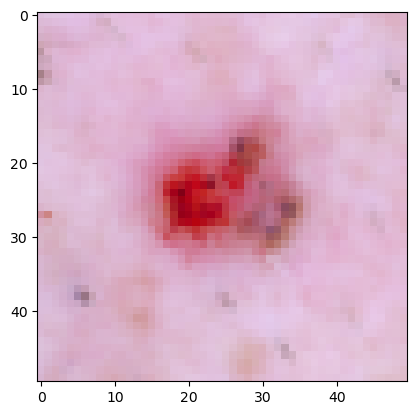

1/1 [==============================] - 0s 35ms/step
Prédiction correcte pour l'image ISIC_0024800.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024801.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024802.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024803.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024804.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024805.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 18ms/step
Prédiction incorrecte pour l'image ISIC_0024806.jpg: Classe prédite = bkl, Classe 

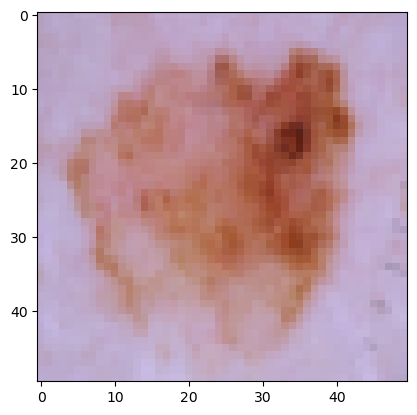

1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024807.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024808.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024809.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024810.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 26ms/step
Prédiction correcte pour l'image ISIC_0024811.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024812.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 30ms/step
Prédiction incorrecte pour l'image ISIC_0024813.jpg: Classe prédite = mel, Classe réelle =

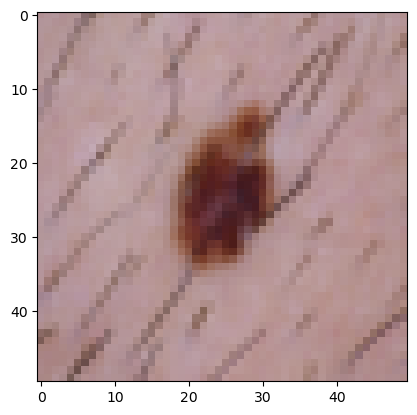

1/1 [==============================] - 0s 35ms/step
Prédiction correcte pour l'image ISIC_0024814.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 12ms/step
Prédiction correcte pour l'image ISIC_0024815.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024816.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024817.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024818.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024819.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 26ms/step
Prédiction correcte pour l'image ISIC_0024820.jpg: Classe prédite = nv, Classe réelle = 

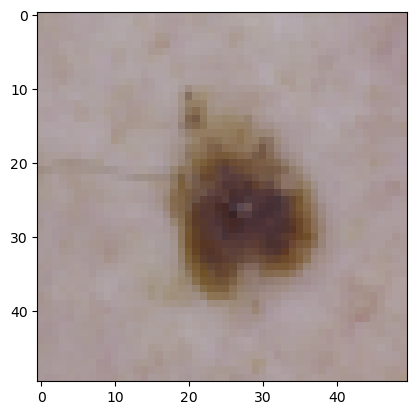

1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024825.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024826.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 35ms/step
Prédiction correcte pour l'image ISIC_0024827.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024828.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024829.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 33ms/step
Prédiction incorrecte pour l'image ISIC_0024830.jpg: Classe prédite = bkl, Classe réelle = nv


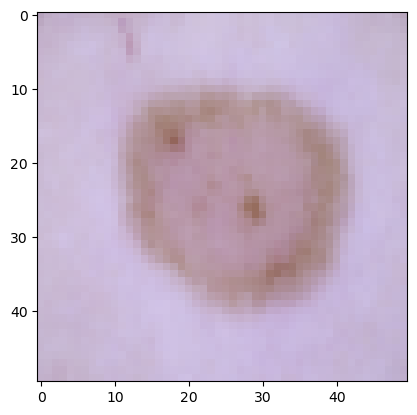

1/1 [==============================] - 0s 25ms/step
Prédiction correcte pour l'image ISIC_0024831.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024832.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024833.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024834.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024835.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 30ms/step
Prédiction incorrecte pour l'image ISIC_0024836.jpg: Classe prédite = bcc, Classe réelle = nv


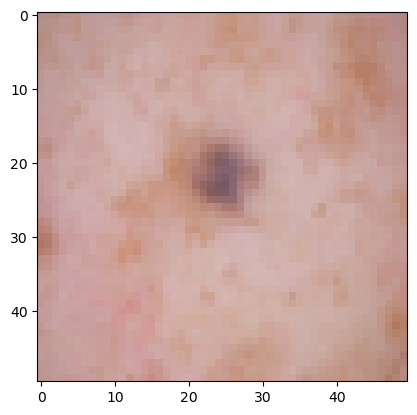

1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024837.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024838.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction incorrecte pour l'image ISIC_0024839.jpg: Classe prédite = nv, Classe réelle = bkl


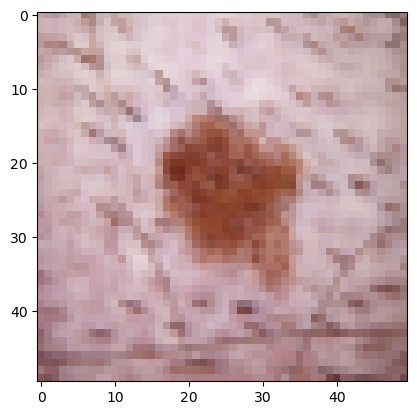

1/1 [==============================] - 0s 25ms/step
Prédiction correcte pour l'image ISIC_0024840.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 37ms/step
Prédiction correcte pour l'image ISIC_0024841.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024842.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction incorrecte pour l'image ISIC_0024843.jpg: Classe prédite = bkl, Classe réelle = akiec


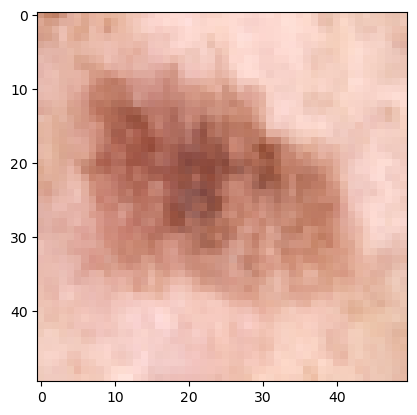

1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024844.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024845.jpg: Classe prédite = df, Classe réelle = df
1/1 [==============================] - 0s 30ms/step
Prédiction correcte pour l'image ISIC_0024846.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024847.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024848.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024849.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024850.jpg: Classe prédite = bkl, Classe réelle =

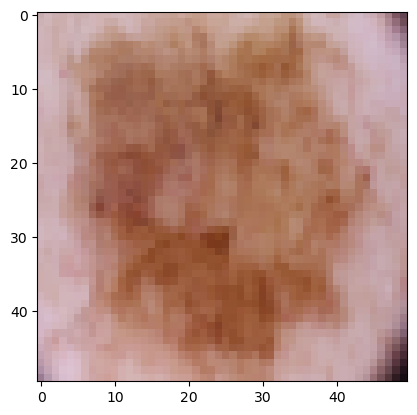

1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024852.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 8ms/step
Prédiction correcte pour l'image ISIC_0024853.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024854.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0024855.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024856.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction incorrecte pour l'image ISIC_0024857.jpg: Classe prédite = bkl, Classe réelle = nv


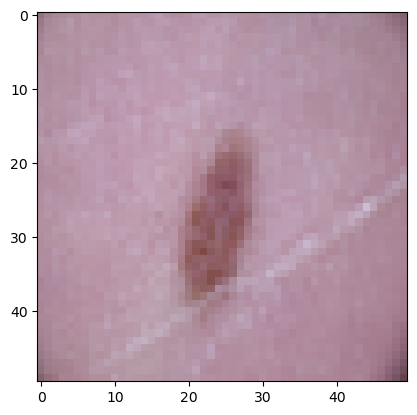

1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024858.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024859.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024860.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 30ms/step
Prédiction correcte pour l'image ISIC_0024861.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024862.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024863.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024864.jpg: Classe prédite = mel, Classe réelle = m

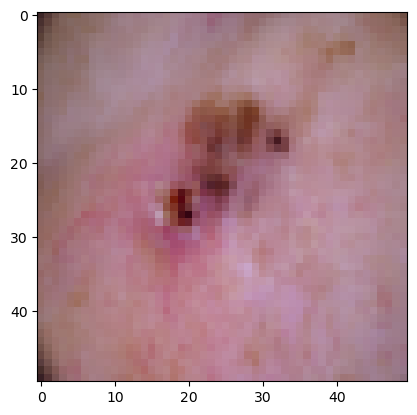

1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024876.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024877.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024878.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024879.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024880.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024881.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 33ms/step
Prédiction incorrecte pour l'image ISIC_0024882.jpg: Classe prédite = bkl, Classe ré

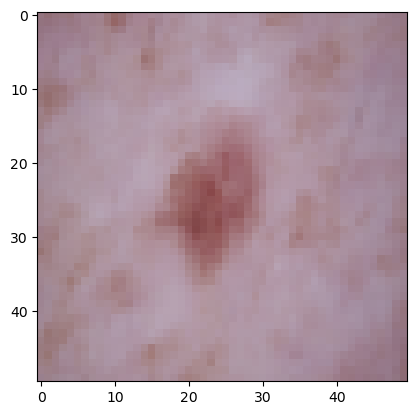

1/1 [==============================] - 0s 21ms/step
Prédiction incorrecte pour l'image ISIC_0024883.jpg: Classe prédite = nv, Classe réelle = bkl


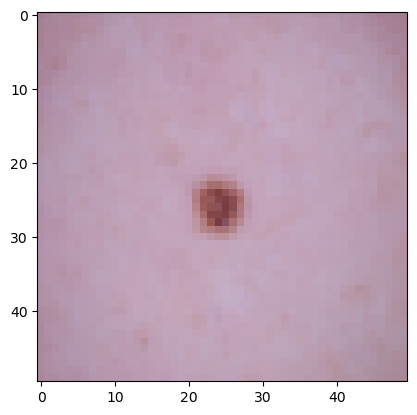

1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0024884.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 13ms/step
Prédiction correcte pour l'image ISIC_0024885.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024886.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 30ms/step
Prédiction correcte pour l'image ISIC_0024887.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024888.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024889.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024890.jpg: Classe prédite = bkl, Classe réelle

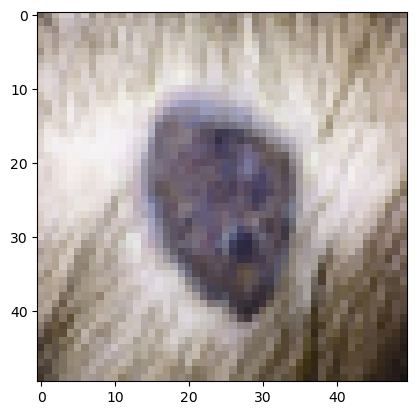

1/1 [==============================] - 0s 13ms/step
Prédiction correcte pour l'image ISIC_0024892.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 23ms/step
Prédiction incorrecte pour l'image ISIC_0024893.jpg: Classe prédite = nv, Classe réelle = bkl


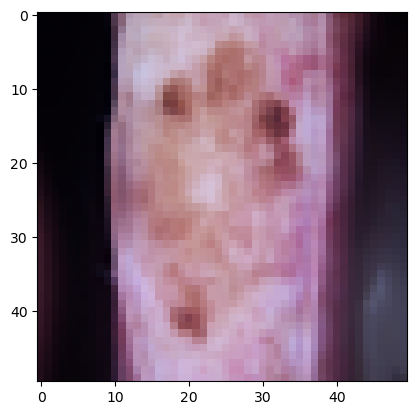

1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024894.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024895.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024896.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024897.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024898.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0024899.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024900.jpg: Classe prédite = mel, Classe réelle

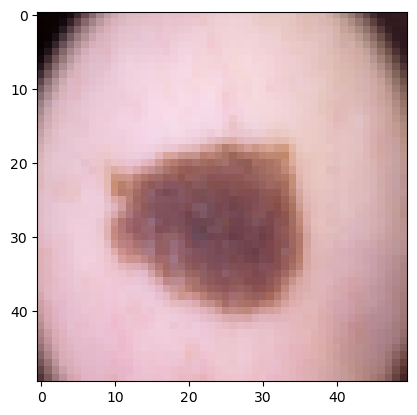

1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024903.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024904.jpg: Classe prédite = vasc, Classe réelle = vasc
1/1 [==============================] - 0s 35ms/step
Prédiction correcte pour l'image ISIC_0024905.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024906.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024907.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 30ms/step
Prédiction correcte pour l'image ISIC_0024908.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 29ms/step
Prédiction correcte pour l'image ISIC_0024909.jpg: Classe prédite = bkl, Classe réelle

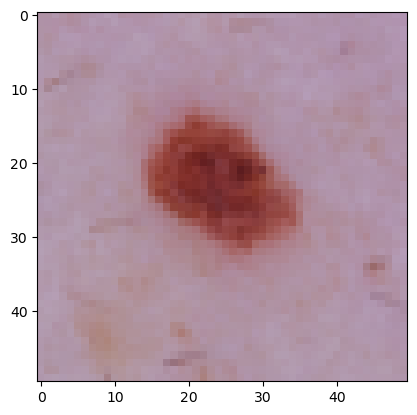

1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024919.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024920.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024921.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024922.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024923.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 12ms/step
Prédiction correcte pour l'image ISIC_0024924.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024925.jpg: Classe prédite = akiec, Classe ré

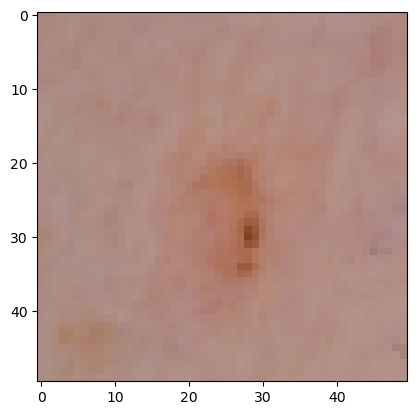

1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024932.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024933.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction incorrecte pour l'image ISIC_0024934.jpg: Classe prédite = bkl, Classe réelle = nv


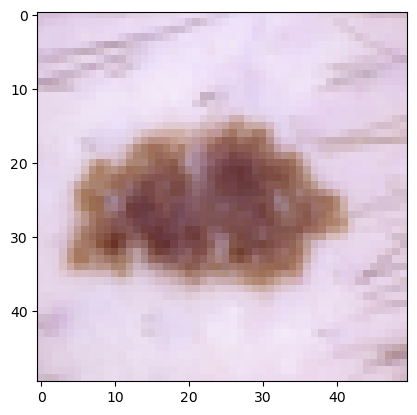

1/1 [==============================] - 0s 16ms/step
Prédiction incorrecte pour l'image ISIC_0024935.jpg: Classe prédite = bcc, Classe réelle = nv


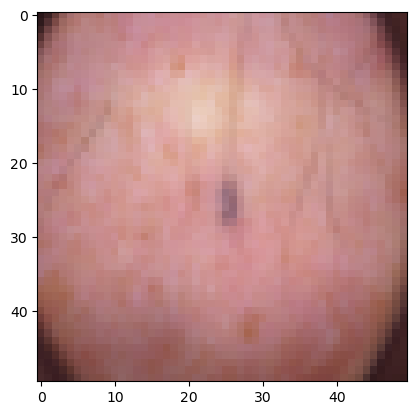

1/1 [==============================] - 0s 11ms/step
Prédiction incorrecte pour l'image ISIC_0024936.jpg: Classe prédite = vasc, Classe réelle = nv


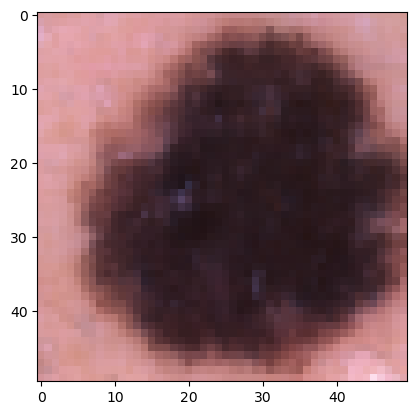

1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0024937.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction incorrecte pour l'image ISIC_0024938.jpg: Classe prédite = bkl, Classe réelle = nv


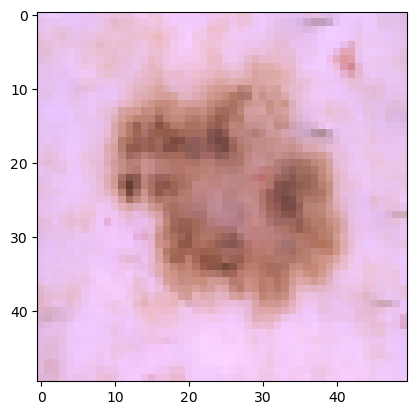

1/1 [==============================] - 0s 26ms/step
Prédiction correcte pour l'image ISIC_0024939.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024940.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 29ms/step
Prédiction correcte pour l'image ISIC_0024941.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 6ms/step
Prédiction correcte pour l'image ISIC_0024942.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024943.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024944.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024945.jpg: Classe prédite = nv, Classe réelle =

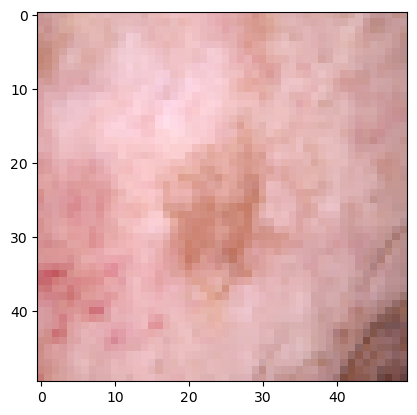

1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024949.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024950.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024951.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024952.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024953.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024954.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024955.jpg: Classe prédite = nv, Classe réell

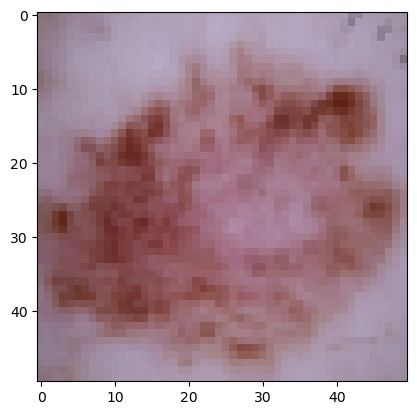

1/1 [==============================] - 0s 40ms/step
Prédiction correcte pour l'image ISIC_0024962.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024963.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024964.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024965.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024966.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024967.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 30ms/step
Prédiction correcte pour l'image ISIC_0024968.jpg: Classe prédite = nv, Classe réelle 

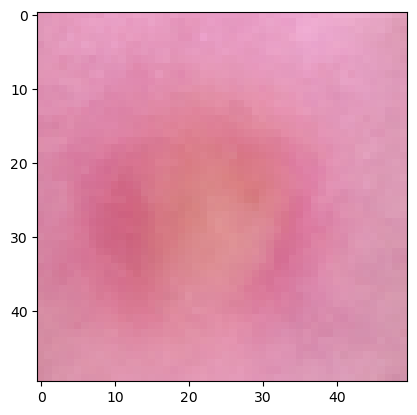

1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0024995.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0024996.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction incorrecte pour l'image ISIC_0024997.jpg: Classe prédite = mel, Classe réelle = bkl


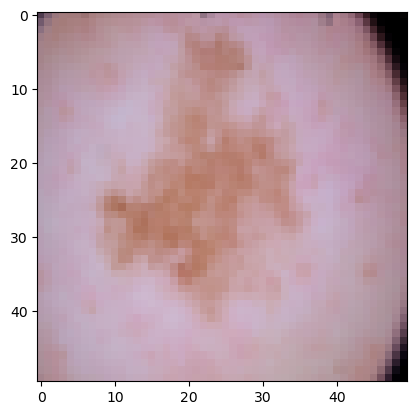

1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024998.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024999.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025000.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0025001.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0025002.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025003.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0025004.jpg: Classe prédite = nv, Classe réelle = 

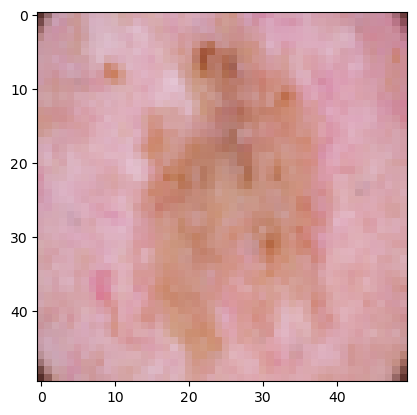

1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0025006.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0025007.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 39ms/step
Prédiction incorrecte pour l'image ISIC_0025008.jpg: Classe prédite = mel, Classe réelle = nv


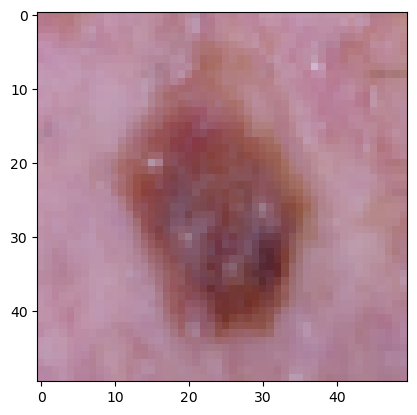

1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0025009.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0025010.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025011.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0025012.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0025013.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0025014.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0025015.jpg: Classe prédite = nv, Classe réelle = nv

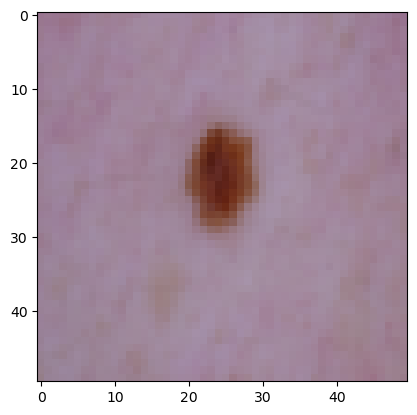

1/1 [==============================] - 0s 28ms/step
Prédiction incorrecte pour l'image ISIC_0025019.jpg: Classe prédite = bkl, Classe réelle = bcc


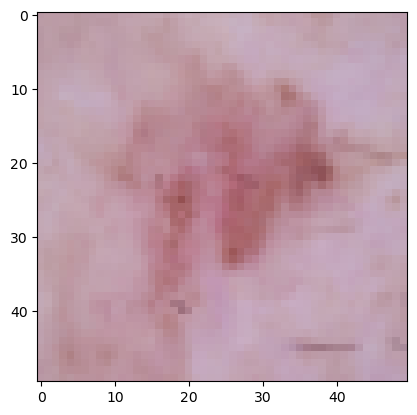

1/1 [==============================] - 0s 35ms/step
Prédiction correcte pour l'image ISIC_0025020.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 25ms/step
Prédiction correcte pour l'image ISIC_0025021.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0025022.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0025023.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0025024.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 25ms/step
Prédiction correcte pour l'image ISIC_0025025.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025026.jpg: Classe prédite = nv, Classe réelle = nv

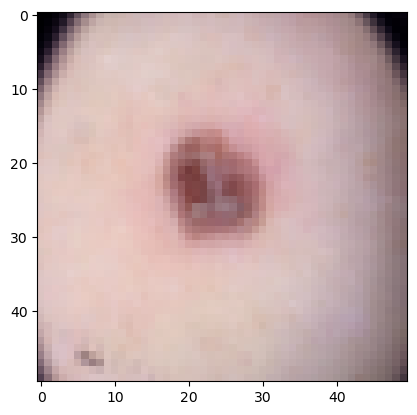

1/1 [==============================] - 0s 27ms/step
Prédiction correcte pour l'image ISIC_0025034.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0025035.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025036.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0025037.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0025038.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0025039.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction incorrecte pour l'image ISIC_0025040.jpg: Classe prédite = nv, Classe réell

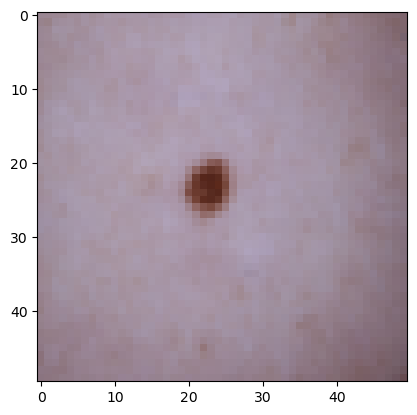

1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0025041.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0025042.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0025043.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 29ms/step
Prédiction correcte pour l'image ISIC_0025044.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0025045.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction incorrecte pour l'image ISIC_0025046.jpg: Classe prédite = vasc, Classe réelle = bcc


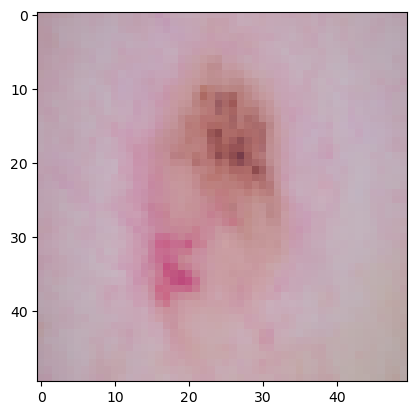

1/1 [==============================] - 0s 27ms/step
Prédiction incorrecte pour l'image ISIC_0025047.jpg: Classe prédite = mel, Classe réelle = nv


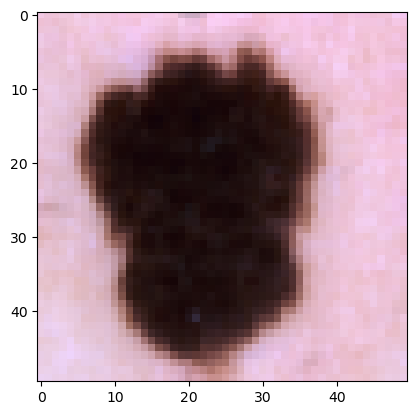

1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0025048.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0025049.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0025050.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0025051.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 35ms/step
Prédiction correcte pour l'image ISIC_0025052.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025053.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0025054.jpg: Classe prédite = nv, Classe réelle = nv

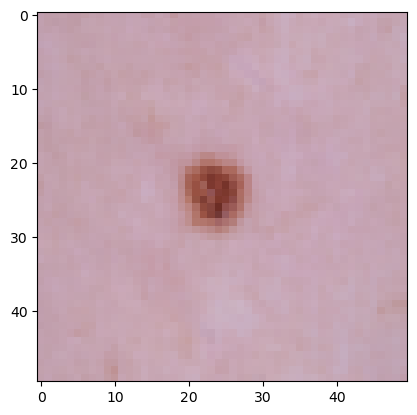

1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025065.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0025066.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0025067.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 29ms/step
Prédiction correcte pour l'image ISIC_0025068.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0025069.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025070.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0025071.jpg: Classe prédite = nv, Classe r

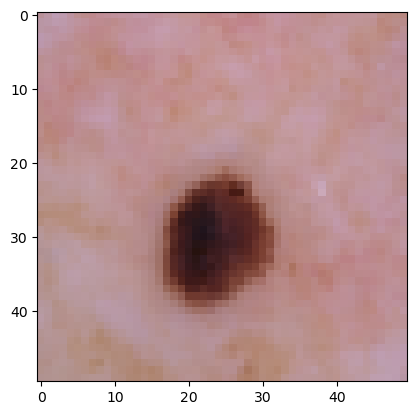

1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0025086.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 42ms/step
Prédiction correcte pour l'image ISIC_0025087.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0025088.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 26ms/step
Prédiction incorrecte pour l'image ISIC_0025089.jpg: Classe prédite = mel, Classe réelle = akiec


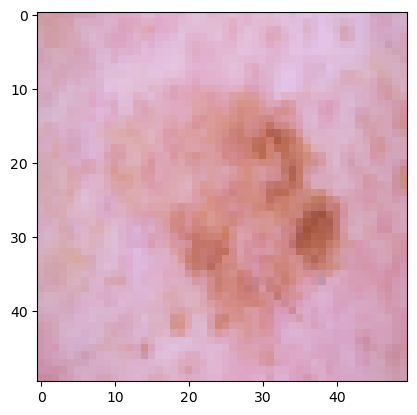

1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0025090.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0025091.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0025092.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0025093.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0025094.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 14ms/step
Prédiction correcte pour l'image ISIC_0025095.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 14ms/step
Prédiction correcte pour l'image ISIC_0025096.jpg: Classe prédite = nv, Classe réelle = nv

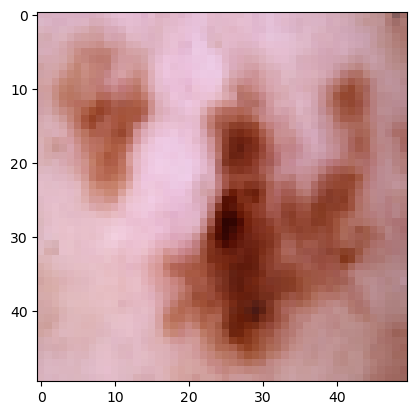

1/1 [==============================] - 0s 19ms/step
Prédiction incorrecte pour l'image ISIC_0025106.jpg: Classe prédite = mel, Classe réelle = nv


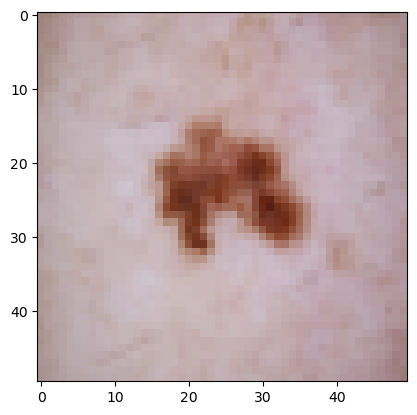

1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0025107.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 22ms/step
Prédiction incorrecte pour l'image ISIC_0025108.jpg: Classe prédite = mel, Classe réelle = nv


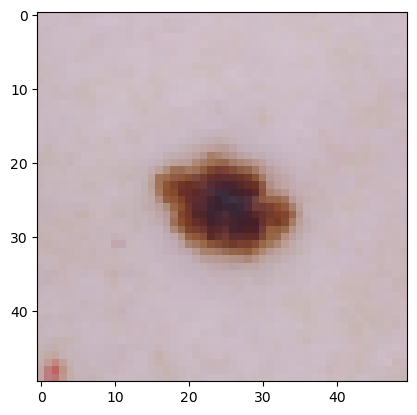

1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0025109.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 13ms/step
Prédiction correcte pour l'image ISIC_0025110.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025111.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction incorrecte pour l'image ISIC_0025112.jpg: Classe prédite = bcc, Classe réelle = nv


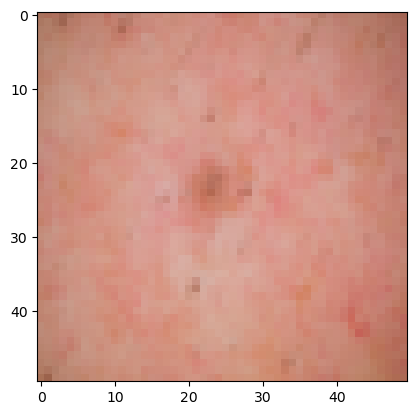

1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0025113.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0025114.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0025115.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0025116.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0025117.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0025118.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0025119.jpg: Classe prédite = nv, Classe réelle = 

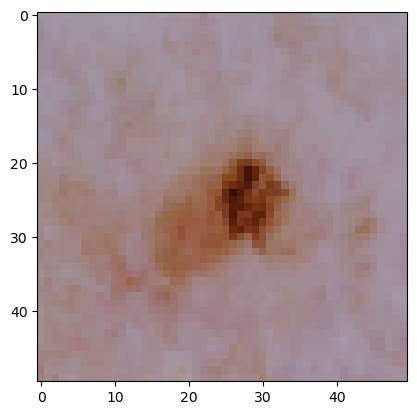

1/1 [==============================] - 0s 20ms/step
Prédiction incorrecte pour l'image ISIC_0025128.jpg: Classe prédite = nv, Classe réelle = mel


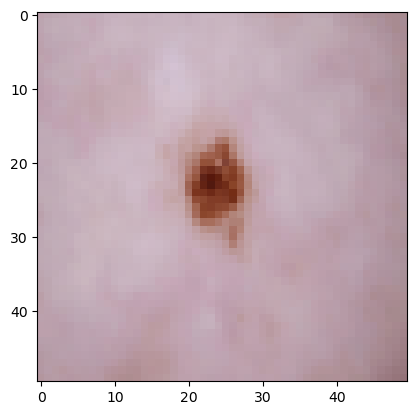

1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0025129.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0025130.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025131.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 14ms/step
Prédiction correcte pour l'image ISIC_0025132.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 17ms/step
Prédiction incorrecte pour l'image ISIC_0025133.jpg: Classe prédite = mel, Classe réelle = nv


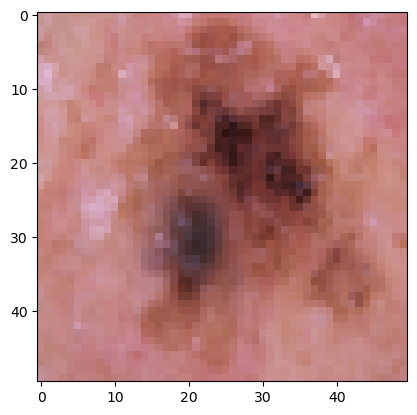

1/1 [==============================] - 0s 35ms/step
Prédiction correcte pour l'image ISIC_0025134.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0025135.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0025136.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0025137.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025138.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025139.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction incorrecte pour l'image ISIC_0025140.jpg: Classe prédite = nv, Classe réelle 

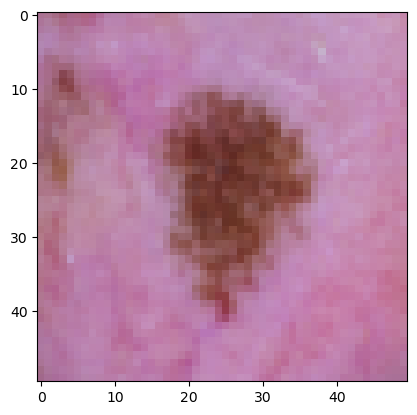

1/1 [==============================] - 0s 14ms/step
Prédiction correcte pour l'image ISIC_0025141.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0025142.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 13ms/step
Prédiction correcte pour l'image ISIC_0025143.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction incorrecte pour l'image ISIC_0025144.jpg: Classe prédite = akiec, Classe réelle = bcc


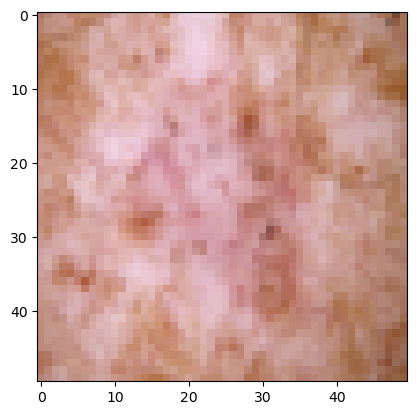

1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0025145.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 25ms/step
Prédiction correcte pour l'image ISIC_0025146.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0025147.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction incorrecte pour l'image ISIC_0025148.jpg: Classe prédite = bkl, Classe réelle = nv


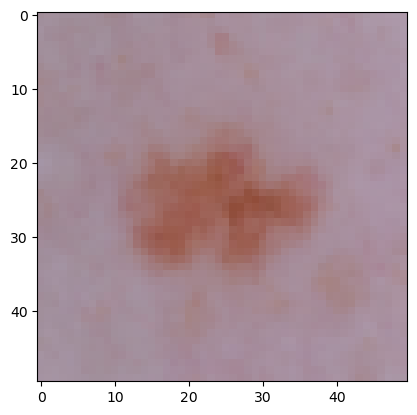

1/1 [==============================] - 0s 10ms/step
Prédiction incorrecte pour l'image ISIC_0025149.jpg: Classe prédite = bkl, Classe réelle = nv


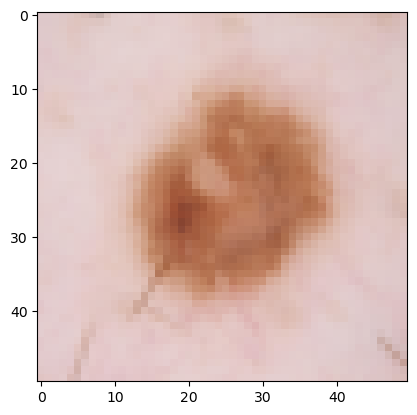

1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0025150.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0025151.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0025152.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0025153.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 15ms/step
Prédiction incorrecte pour l'image ISIC_0025154.jpg: Classe prédite = bkl, Classe réelle = df


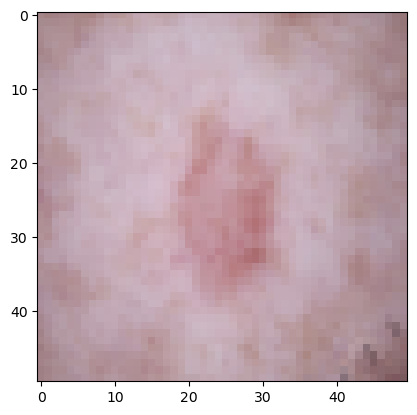

1/1 [==============================] - 0s 31ms/step
Prédiction incorrecte pour l'image ISIC_0025155.jpg: Classe prédite = nv, Classe réelle = mel


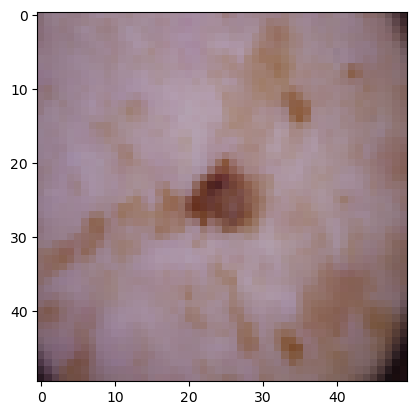

1/1 [==============================] - 0s 27ms/step
Prédiction incorrecte pour l'image ISIC_0025156.jpg: Classe prédite = bkl, Classe réelle = nv


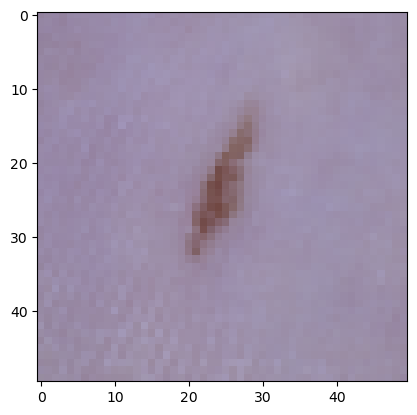

1/1 [==============================] - 0s 26ms/step
Prédiction correcte pour l'image ISIC_0025157.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0025158.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 38ms/step
Prédiction correcte pour l'image ISIC_0025159.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025160.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0025161.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0025162.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0025163.jpg: Classe prédite = nv, Classe réelle = 

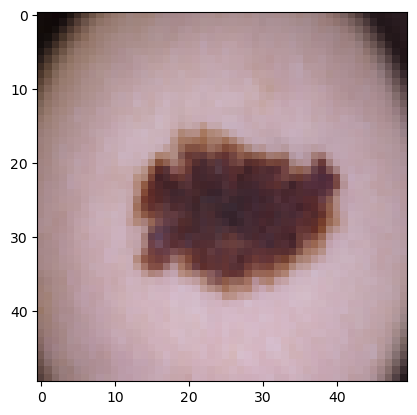

1/1 [==============================] - 0s 16ms/step
Prédiction incorrecte pour l'image ISIC_0025169.jpg: Classe prédite = mel, Classe réelle = nv


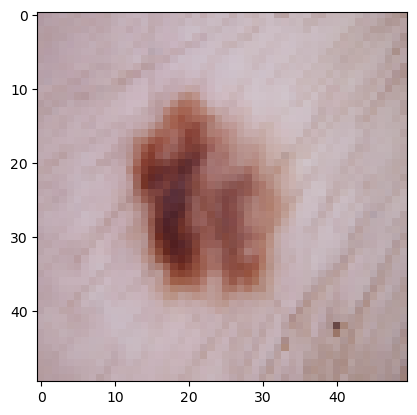

1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0025170.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0025171.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 13ms/step
Prédiction correcte pour l'image ISIC_0025172.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 22ms/step
Prédiction incorrecte pour l'image ISIC_0025173.jpg: Classe prédite = bkl, Classe réelle = nv


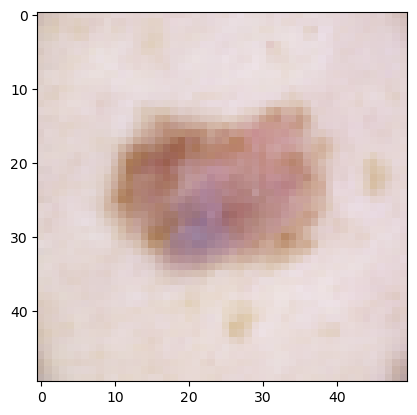

1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0025174.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0025175.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0025176.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025177.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0025178.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 14ms/step
Prédiction correcte pour l'image ISIC_0025179.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 28ms/step
Prédiction incorrecte pour l'image ISIC_0025180.jpg: Classe prédite = nv, Classe rée

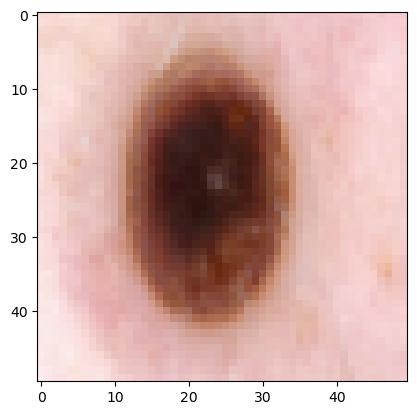

1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0025181.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0025182.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0025183.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 13ms/step
Prédiction correcte pour l'image ISIC_0025184.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0025185.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0025186.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 13ms/step
Prédiction correcte pour l'image ISIC_0025187.jpg: Classe prédite = nv, Classe réell

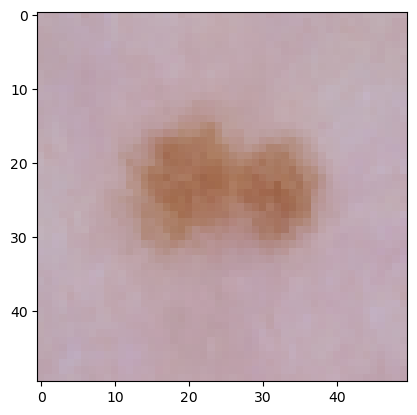

1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0025200.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0025201.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0025202.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0025203.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0025204.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025205.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0025206.jpg: Classe prédite = nv, Classe réelle = nv

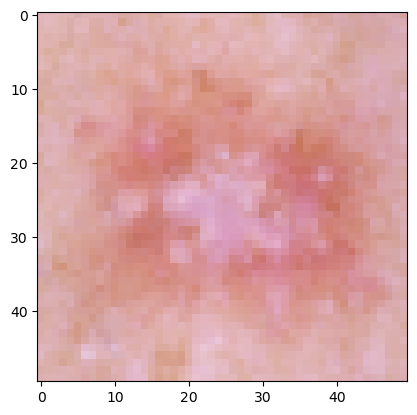

1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025224.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0025225.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0025226.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0025227.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 35ms/step
Prédiction correcte pour l'image ISIC_0025228.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0025229.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0025230.jpg: Classe prédite = nv, Classe réelle = nv

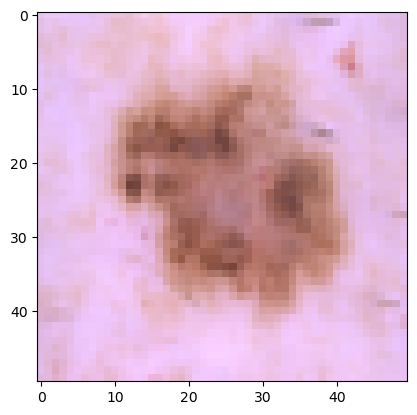

1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0025232.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 57ms/step
Prédiction correcte pour l'image ISIC_0025233.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0025234.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0025235.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0025236.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0025237.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction incorrecte pour l'image ISIC_0025238.jpg: Classe prédite = nv, Classe réell

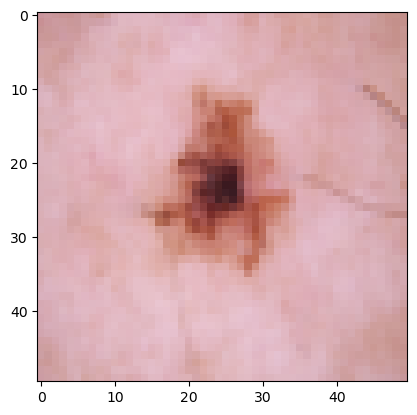

1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0025239.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction incorrecte pour l'image ISIC_0025240.jpg: Classe prédite = mel, Classe réelle = nv


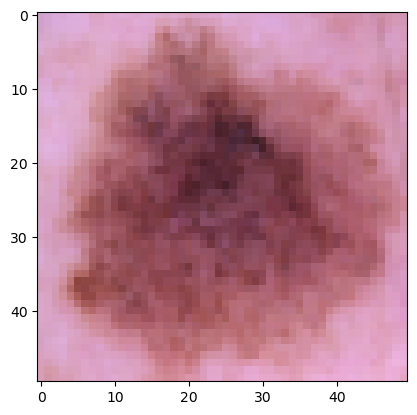

1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0025241.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 37ms/step
Prédiction correcte pour l'image ISIC_0025242.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0025243.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 26ms/step
Prédiction correcte pour l'image ISIC_0025244.jpg: Classe prédite = vasc, Classe réelle = vasc
1/1 [==============================] - 0s 23ms/step
Prédiction incorrecte pour l'image ISIC_0025245.jpg: Classe prédite = mel, Classe réelle = nv


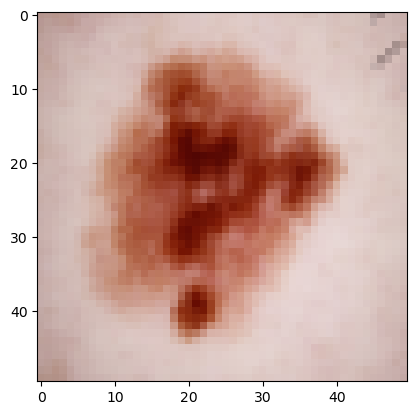

1/1 [==============================] - 0s 70ms/step
Prédiction correcte pour l'image ISIC_0025246.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 73ms/step
Prédiction correcte pour l'image ISIC_0025247.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 65ms/step
Prédiction correcte pour l'image ISIC_0025248.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 67ms/step
Prédiction correcte pour l'image ISIC_0025249.jpg: Classe prédite = vasc, Classe réelle = vasc
1/1 [==============================] - 0s 69ms/step
Prédiction incorrecte pour l'image ISIC_0025250.jpg: Classe prédite = bcc, Classe réelle = vasc


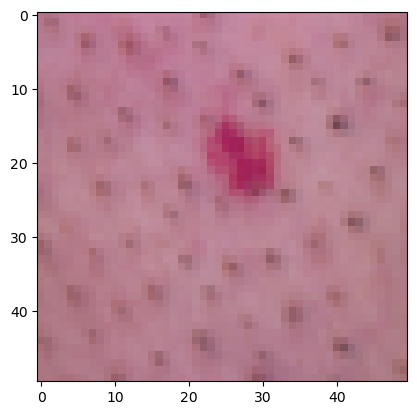

1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0025251.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0025252.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 67ms/step
Prédiction correcte pour l'image ISIC_0025253.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 68ms/step
Prédiction correcte pour l'image ISIC_0025254.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 67ms/step
Prédiction correcte pour l'image ISIC_0025255.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 67ms/step
Prédiction correcte pour l'image ISIC_0025256.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 66ms/step
Prédiction correcte pour l'image ISIC_0025257.jpg: Classe prédite = nv, Classe réelle = nv

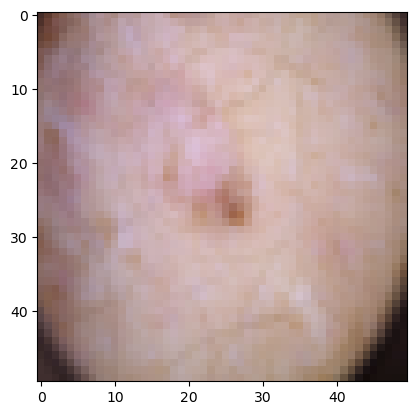

1/1 [==============================] - 0s 58ms/step
Prédiction correcte pour l'image ISIC_0025261.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 60ms/step
Prédiction correcte pour l'image ISIC_0025262.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 67ms/step
Prédiction correcte pour l'image ISIC_0025263.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 49ms/step
Prédiction correcte pour l'image ISIC_0025264.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 43ms/step
Prédiction incorrecte pour l'image ISIC_0025265.jpg: Classe prédite = nv, Classe réelle = mel


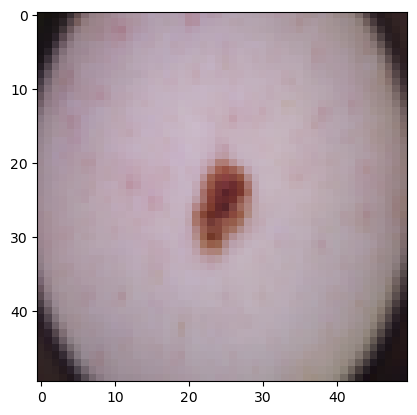

1/1 [==============================] - 0s 59ms/step
Prédiction correcte pour l'image ISIC_0025266.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 82ms/step
Prédiction correcte pour l'image ISIC_0025267.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 66ms/step
Prédiction incorrecte pour l'image ISIC_0025268.jpg: Classe prédite = bkl, Classe réelle = mel


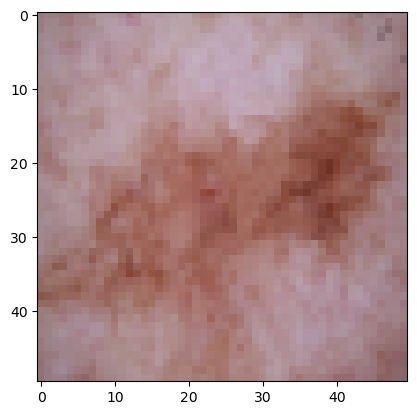

1/1 [==============================] - 0s 67ms/step
Prédiction correcte pour l'image ISIC_0025269.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 83ms/step
Prédiction correcte pour l'image ISIC_0025270.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 68ms/step
Prédiction correcte pour l'image ISIC_0025271.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 67ms/step
Prédiction correcte pour l'image ISIC_0025272.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 67ms/step
Prédiction correcte pour l'image ISIC_0025273.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 67ms/step
Prédiction correcte pour l'image ISIC_0025274.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 73ms/step
Prédiction incorrecte pour l'image ISIC_0025275.jpg: Classe prédite = vasc, Classe réelle 

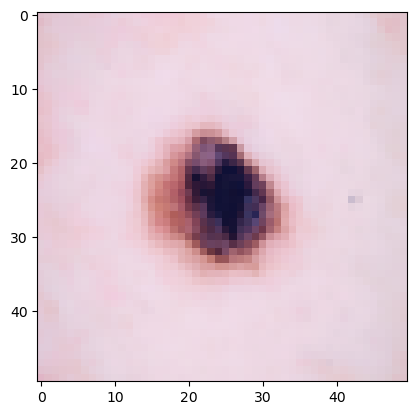

1/1 [==============================] - 0s 66ms/step
Prédiction correcte pour l'image ISIC_0025276.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 60ms/step
Prédiction correcte pour l'image ISIC_0025277.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 57ms/step
Prédiction correcte pour l'image ISIC_0025278.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 65ms/step
Prédiction correcte pour l'image ISIC_0025279.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 67ms/step
Prédiction correcte pour l'image ISIC_0025280.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 67ms/step
Prédiction correcte pour l'image ISIC_0025281.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 66ms/step
Prédiction correcte pour l'image ISIC_0025282.jpg: Classe prédite = nv, Classe réelle 

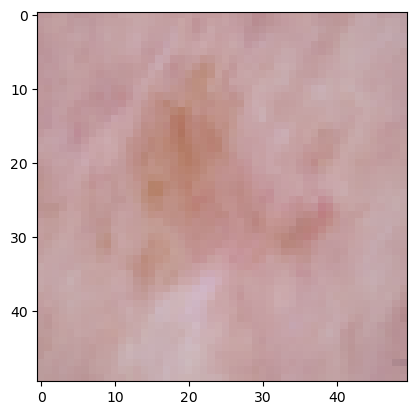

1/1 [==============================] - 0s 59ms/step
Prédiction correcte pour l'image ISIC_0025286.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 56ms/step
Prédiction correcte pour l'image ISIC_0025287.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 69ms/step
Prédiction correcte pour l'image ISIC_0025288.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 52ms/step
Prédiction correcte pour l'image ISIC_0025289.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0025290.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 71ms/step
Prédiction correcte pour l'image ISIC_0025291.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 67ms/step
Prédiction correcte pour l'image ISIC_0025292.jpg: Classe prédite = bkl, Classe réelle =

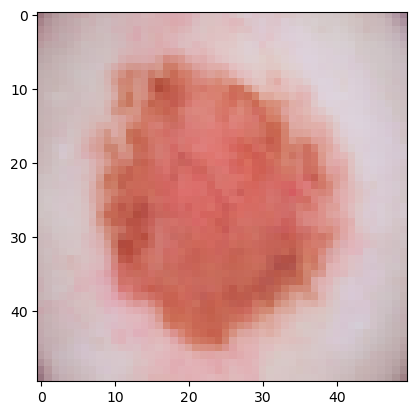

In [61]:
import os
import pandas as pd
from PIL import Image


dossier_images = '../archive/HAM10000_images_part_1/'
chemin_metadata ="../archive/HAM10000_metadata.csv"

fichier_sortie = open("predictions_incorrectes.txt", "w")

metadata = pd.read_csv(chemin_metadata)

for nom_image in os.listdir(dossier_images)[:1000]:
    chemin_image = os.path.join(dossier_images, nom_image)
    image = Image.open(chemin_image)
    image = image.resize((50, 50))
    img = np.array(image)
    img = np.array(image).reshape(-1, 50, 50, 3)

    prediction = model.predict(img)
    prediction = prediction.tolist()
    max_prob = max(prediction[0])
    class_ind = prediction[0].index(max_prob)

    nom_image_sans_extension = os.path.splitext(nom_image)[0]
    classe_reelle = metadata[metadata['image_id'] == nom_image_sans_extension]['dx'].values[0]
    
    nom_classe_predite = classes[class_ind][0]

    if nom_classe_predite == classe_reelle:
        print(f"Prédiction correcte pour l'image {nom_image}: Classe prédite = {nom_classe_predite}, Classe réelle = {classe_reelle}")
    else:
        print(f"Prédiction incorrecte pour l'image {nom_image}: Classe prédite = {nom_classe_predite}, Classe réelle = {classe_reelle}")
        fichier_sortie.write(f"Prédiction incorrecte pour l'image {nom_image}: Classe prédite = {nom_classe_predite}, Classe réelle = {classe_reelle}\n")
        plt.imshow(image)
        plt.show()

fichier_sortie.close()

63/63 [==============================] - 1s 19ms/step


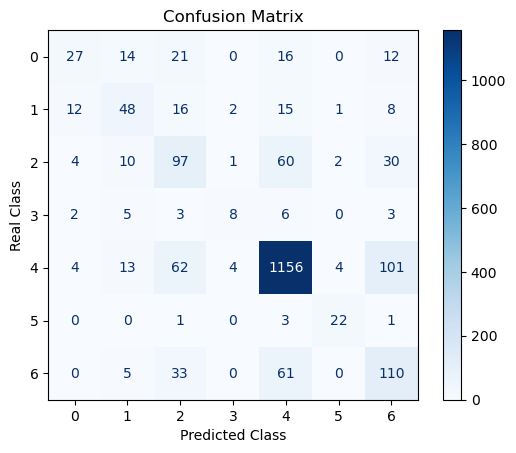

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(x_test_resampled)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.title("Confusion Matrix")
plt.show()
